In [6]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow
import cmcrameri.cm as cmcm

In [7]:
spectrum_sav = scipy.io.readsav("../../save/spectrum/noti_chianti10/spectrum_pch_2063_eis_noti_chianti10_instdlamb_v2.sav")
syn_spec = np.mean(spectrum_sav["w"][:,:,:],axis=1)
wvl = spectrum_sav["x"][0,0,0,:]
y_coord = spectrum_sav["x"][2,:,0,0]

In [8]:
syn_spec.shape

(41, 4103)

In [9]:
np.where(wvl>220)

(array([2049, 2050, 2051, ..., 4100, 4101, 4102]),)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


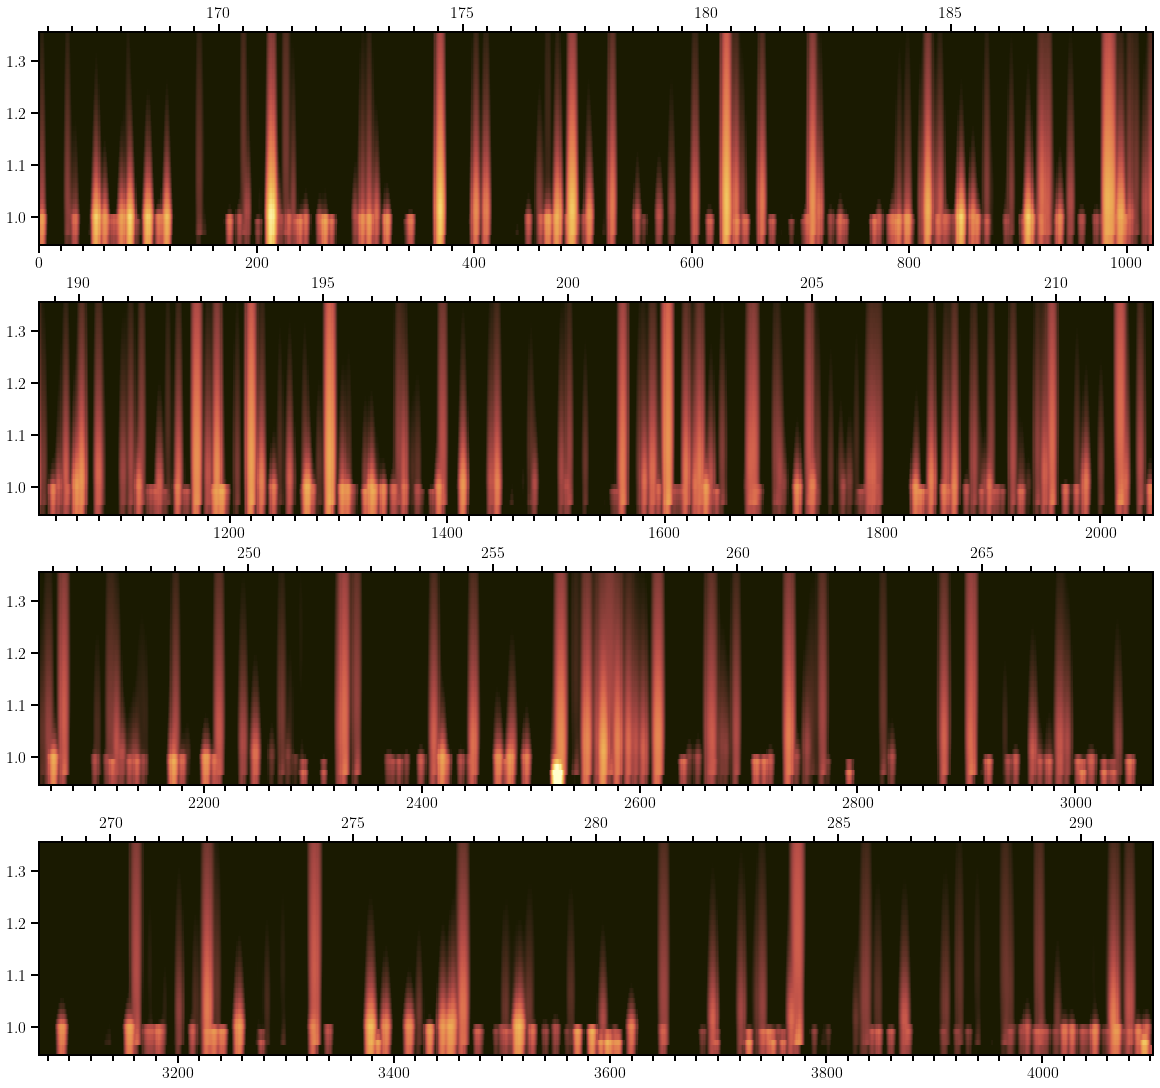

In [10]:
fig, axes = plt.subplots(4,1,figsize=(16,15),constrained_layout=True)

axes_range = ((0,1025),(1025,2049),(2049,3072),(3072,4103))
for ii in range(4):
    axes[ii].pcolormesh(np.arange(axes_range[ii][0],axes_range[ii][1]),y_coord,
                    np.nan_to_num(np.log10(syn_spec[:,axes_range[ii][0]:axes_range[ii][1]]),nan=-np.inf),
                    cmap=cmcm.lajolla_r,shading="auto",vmin=-1,vmax=5)

    ax_wvl = axes[ii].twiny()
    ax_wvl.set_xlim(wvl[axes_range[ii][0]],wvl[axes_range[ii][1]-1])
    axes[ii].xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
    ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))

    for ax_ in (axes[ii], ax_wvl):
        ax_.tick_params(labelsize=16)
        ax_.tick_params(which="major",width=2,length=8)
        ax_.tick_params(which="minor",width=2,length=6)


## Short Wavelength Detector
---

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04344807]


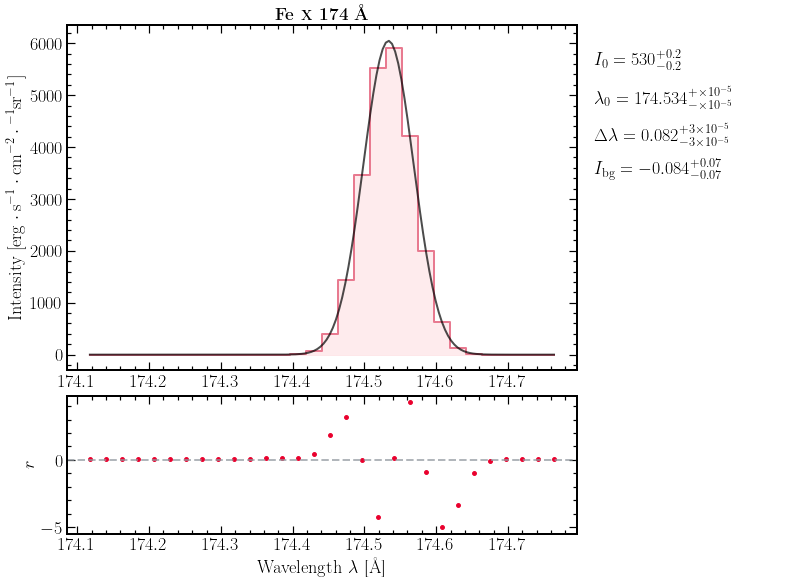

In [11]:
FeX_174_slice = (350,380)
wvl_FeX_174 = wvl[FeX_174_slice[0]:FeX_174_slice[1]]
int_FeX_174 = np.average(syn_spec[6:9,FeX_174_slice[0]:FeX_174_slice[1]],axis=0)

FeX_174_fit_model = SpectrumFitSingle(data=int_FeX_174,wvl=wvl_FeX_174,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[174.5],
                                      int_max_init=[10000],fwhm_init=[0.05])
# FeX_174_fit_model.plot(plot_fit=False,plot_params=False)
FeX_174_fit_model.run_HahnMC(n_chain=10000)
FeX_174_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 174 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_174_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04135556 0.04404755]


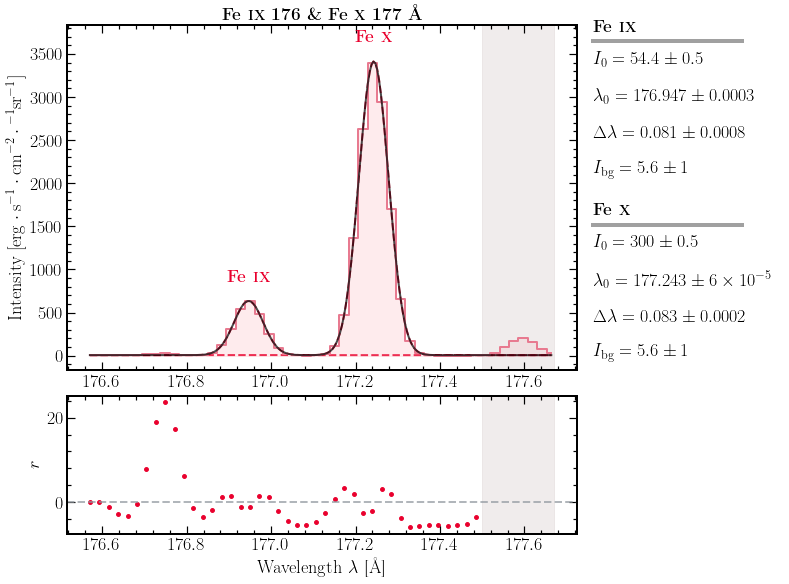

In [12]:
FeIX_176_FeX_177_slice = (460,510)
wvl_FeIX_176_FeX_177 = wvl[FeIX_176_FeX_177_slice[0]:FeIX_176_FeX_177_slice[1]]
int_FeIX_176_FeX_177 = np.average(syn_spec[6:9,FeIX_176_FeX_177_slice[0]:FeIX_176_FeX_177_slice[1]],axis=0)

FeIX_176_FeX_177_fit_model = SpectrumFitSingle(data=int_FeIX_176_FeX_177,wvl=wvl_FeIX_176_FeX_177,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[176.95,177.22],
                                      int_max_init=[400,2000],fwhm_init=[0.08,0.08],mask=[[177.5,177.67]])
# FeIX_176_FeX_177_fit_model.plot(plot_fit=False,plot_params=False)
# FeIX_176_FeX_177_fit_model.run_HahnMC(n_chain=10000)
FeIX_176_FeX_177_fit_model.run_lse()
FeIX_176_FeX_177_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 176 \& Fe \textsc{x} 177 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{ix}}",r"\textbf{Fe \textsc{x}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_176_FeX_177_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05502255]


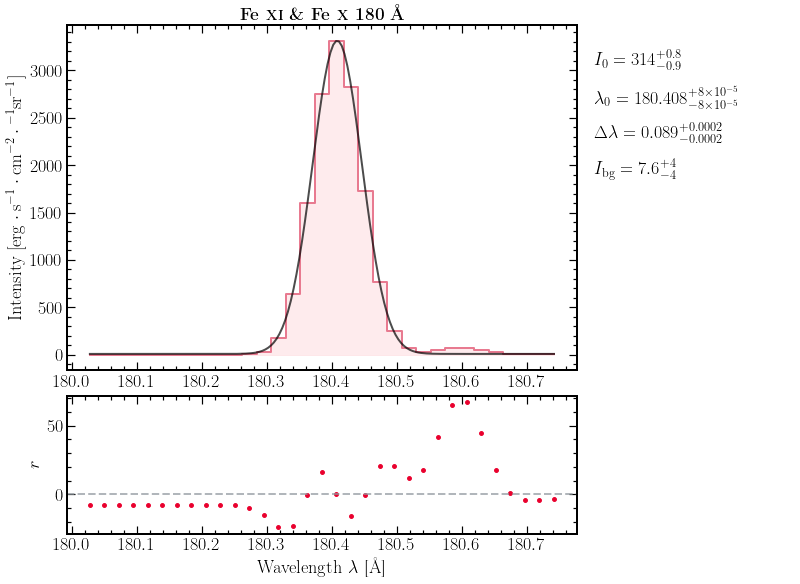

In [13]:
FeXI_FeX_180_slice = (615,648)
wvl_FeXI_FeX_180 = wvl[FeXI_FeX_180_slice[0]:FeXI_FeX_180_slice[1]]
int_FeXI_FeX_180 = np.average(syn_spec[6:9,FeXI_FeX_180_slice[0]:FeXI_FeX_180_slice[1]],axis=0)

FeXI_FeX_180_fit_model = SpectrumFitSingle(data=int_FeXI_FeX_180,wvl=wvl_FeXI_FeX_180,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[180.4],
                                      int_max_init=[1100],fwhm_init=[0.08])
# FeXI_FeX_180_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_FeX_180_fit_model.run_HahnMC(n_chain=10000)
# FeXI_FeX_180_fit_model.run_lse()
FeXI_FeX_180_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& Fe \textsc{x} 180 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeX_180_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05034139 0.04229942]


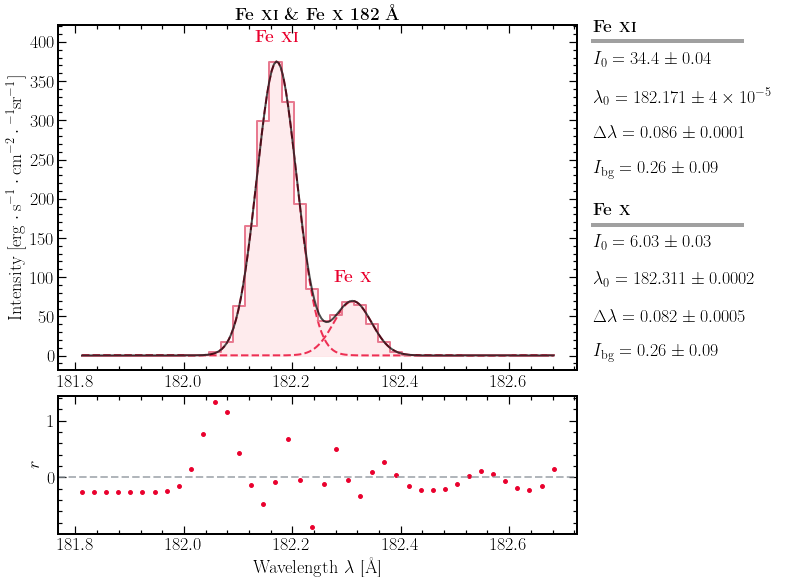

In [14]:
FeXI_FeX_182_slice = (695,735)
wvl_FeXI_FeX_182 = wvl[FeXI_FeX_182_slice[0]:FeXI_FeX_182_slice[1]]
int_FeXI_FeX_182 = np.average(syn_spec[6:9,FeXI_FeX_182_slice[0]:FeXI_FeX_182_slice[1]],axis=0)

FeXI_FeX_182_fit_model = SpectrumFitSingle(data=int_FeXI_FeX_182,wvl=wvl_FeXI_FeX_182,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[182.18,182.28],
                                      int_max_init=[200,100],fwhm_init=[0.08,0.08])
# FeXI_FeX_182_fit_model.plot(plot_fit=False,plot_params=False)
# FeXI_FeX_182_fit_model.run_HahnMC(n_chain=10000)
FeXI_FeX_182_fit_model.run_lse()
FeXI_FeX_182_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& Fe \textsc{x} 182 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{x}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeX_182_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.03497598 0.04988716 0.04798214]


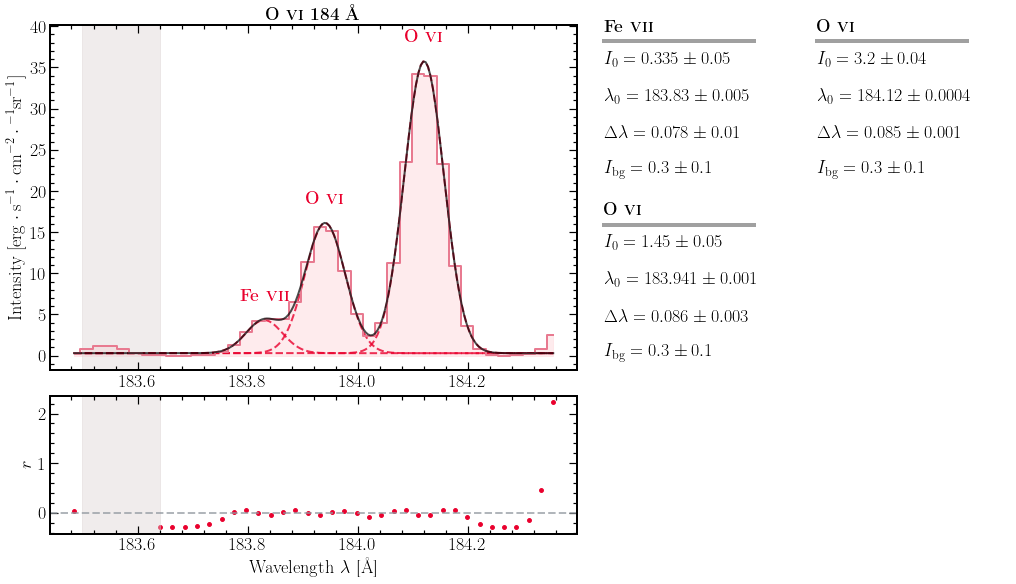

In [15]:
OVI_184_slice = (770,810)
wvl_OVI_184 = wvl[OVI_184_slice[0]:OVI_184_slice[1]]
int_OVI_184 = np.average(syn_spec[6:9,OVI_184_slice[0]:OVI_184_slice[1]],axis=0)

OVI_184_fit_model = SpectrumFitSingle(data=int_OVI_184,wvl=wvl_OVI_184,err=None,
                                      same_width=False,line_number=3,line_wvl_init=[183.83,183.93,184.1],
                                      int_max_init=[30,30,50],fwhm_init=[0.07,0.07,0.07],mask=[[183.5,183.64]])
# OVI_184_fit_model.plot(plot_fit=False,plot_params=False)
# OVI_184_fit_model.run_HahnMC(n_chain=10000)
OVI_184_fit_model.run_lse()
OVI_184_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 184 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{vii}}",r"\textbf{O \textsc{vi}}",
                            r"\textbf{O \textsc{vi}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(OVI_184_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04399205 0.04574664]


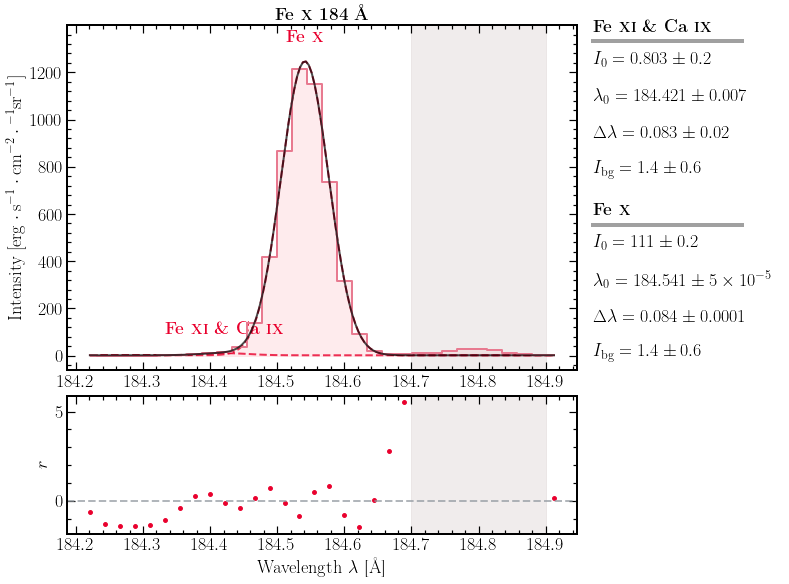

In [16]:
FeX_184_slice = (803,835)
wvl_FeX_184 = wvl[FeX_184_slice[0]:FeX_184_slice[1]]
int_FeX_184 = np.average(syn_spec[6:9,FeX_184_slice[0]:FeX_184_slice[1]],axis=0)

FeX_184_fit_model = SpectrumFitSingle(data=int_FeX_184,wvl=wvl_FeX_184,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[184.4,184.53],
                                      int_max_init=[100,1000],fwhm_init=[0.07,0.07],mask=[[184.7,184.9]])
# FeX_184_fit_model.plot(plot_fit=False,plot_params=False)
# FeX_184_fit_model.run_HahnMC(n_chain=10000)
FeX_184_fit_model.run_lse()
FeX_184_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 184 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi} \& Ca \textsc{ix}}",r"\textbf{Fe \textsc{x}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_184_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04189094]


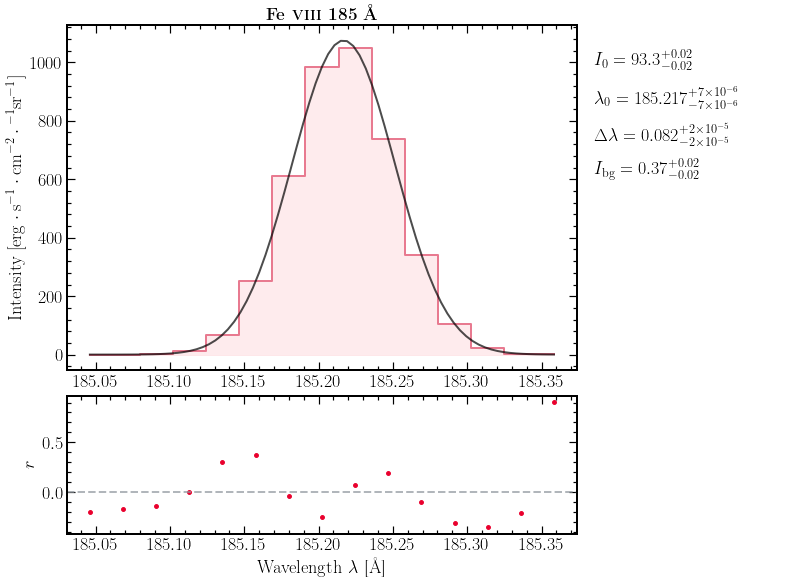

In [17]:
FeVIII_185_slice = (840,855)
wvl_FeVIII_185 = wvl[FeVIII_185_slice[0]:FeVIII_185_slice[1]]
int_FeVIII_185 = np.average(syn_spec[6:9,FeVIII_185_slice[0]:FeVIII_185_slice[1]],axis=0)

FeVIII_185_fit_model = SpectrumFitSingle(data=int_FeVIII_185,wvl=wvl_FeVIII_185,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[185.2],
                                      int_max_init=[800],fwhm_init=[0.07])
# FeVIII_185_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_185_fit_model.run_HahnMC(n_chain=10000)
# FeVIII_185_fit_model.run_lse()
FeVIII_185_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 185 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_185_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04232288 0.03733301]


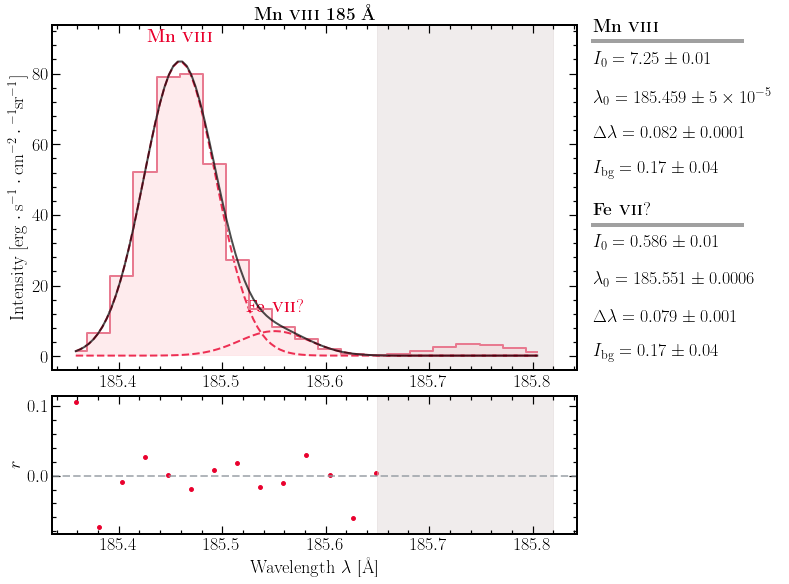

In [18]:
MnVIII_185_slice = (854,875)
wvl_MnVIII_185 = wvl[MnVIII_185_slice[0]:MnVIII_185_slice[1]]
int_MnVIII_185 = np.average(syn_spec[6:9,MnVIII_185_slice[0]:MnVIII_185_slice[1]],axis=0)

MnVIII_185_fit_model = SpectrumFitSingle(data=int_MnVIII_185,wvl=wvl_MnVIII_185,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[185.45,185.57],
                                      int_max_init=[100,18],fwhm_init=[0.06,0.06],mask=[[185.65,185.82]],
                                      int_cont_init=0)
# MnVIII_185_fit_model.plot(plot_fit=False,plot_params=False)
# MnVIII_185_fit_model.run_HahnMC(n_chain=10000)
MnVIII_185_fit_model.run_lse()
MnVIII_185_fit_model.plot(plot_title=r"\textbf{Mn \textsc{viii} 185 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Mn \textsc{viii}}",r"\textbf{Fe \textsc{vii}}?"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(MnVIII_185_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04316106]


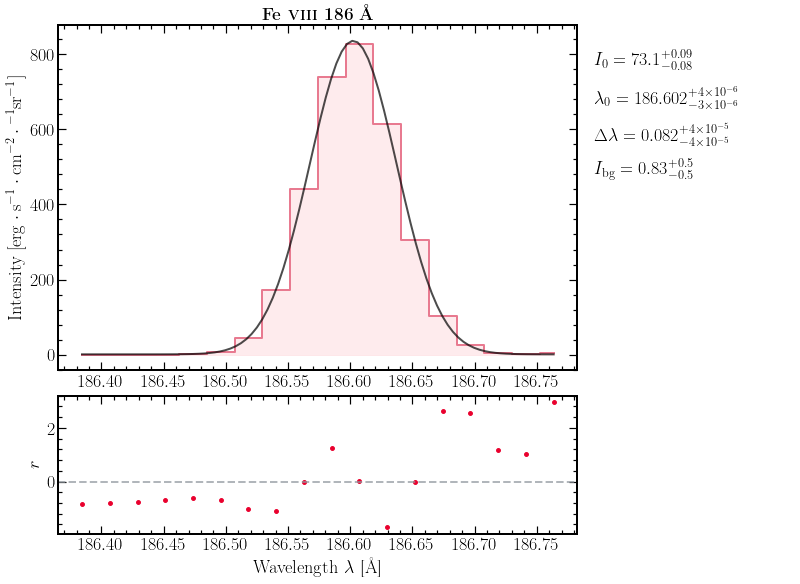

In [19]:
FeVIII_186_slice = (900,918)
wvl_FeVIII_186 = wvl[FeVIII_186_slice[0]:FeVIII_186_slice[1]]
int_FeVIII_186 = np.average(syn_spec[6:9,FeVIII_186_slice[0]:FeVIII_186_slice[1]],axis=0)

FeVIII_186_fit_model = SpectrumFitSingle(data=int_FeVIII_186,wvl=wvl_FeVIII_186,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[186.6],
                                      int_max_init=[600],fwhm_init=[0.07])
# FeVIII_186_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_186_fit_model.run_HahnMC(n_chain=10000)
# FeVIII_186_fit_model.run_lse()
FeVIII_186_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 186 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_186_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.07683099 0.05163386 0.03771393 0.03514982]


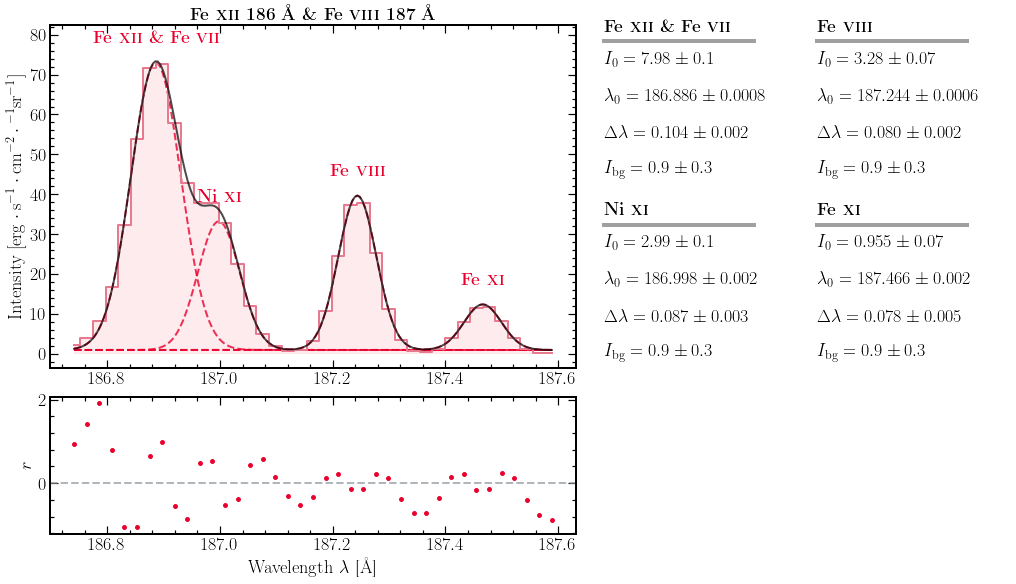

In [20]:
FeXII_186_slice = (916,955)
wvl_FeXII_186 = wvl[FeXII_186_slice[0]:FeXII_186_slice[1]]
int_FeXII_186 = np.average(syn_spec[6:9,FeXII_186_slice[0]:FeXII_186_slice[1]],axis=0)

FeXII_186_fit_model = SpectrumFitSingle(data=int_FeXII_186,wvl=wvl_FeXII_186,err=None,
                                      same_width=False,line_number=4,line_wvl_init=[186.88,186.97,187.22,187.48],
                                      int_max_init=[70,40,50,10],fwhm_init=[0.08,0.08,0.08,0.08])
# FeXII_186_fit_model.plot(plot_fit=False,plot_params=False)
# FeXII_186_fit_model.run_HahnMC(n_chain=10000)
FeXII_186_fit_model.run_lse()
FeXII_186_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 186 \mbox{\AA} \& Fe \textsc{viii} 187 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xii} \& Fe \textsc{vii}}",
                                 r"\textbf{Ni \textsc{xi}}",r"\textbf{Fe \textsc{viii}}",r"\textbf{Fe \textsc{xi}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_186_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05215192 0.05215192 0.04685851 0.06885359]


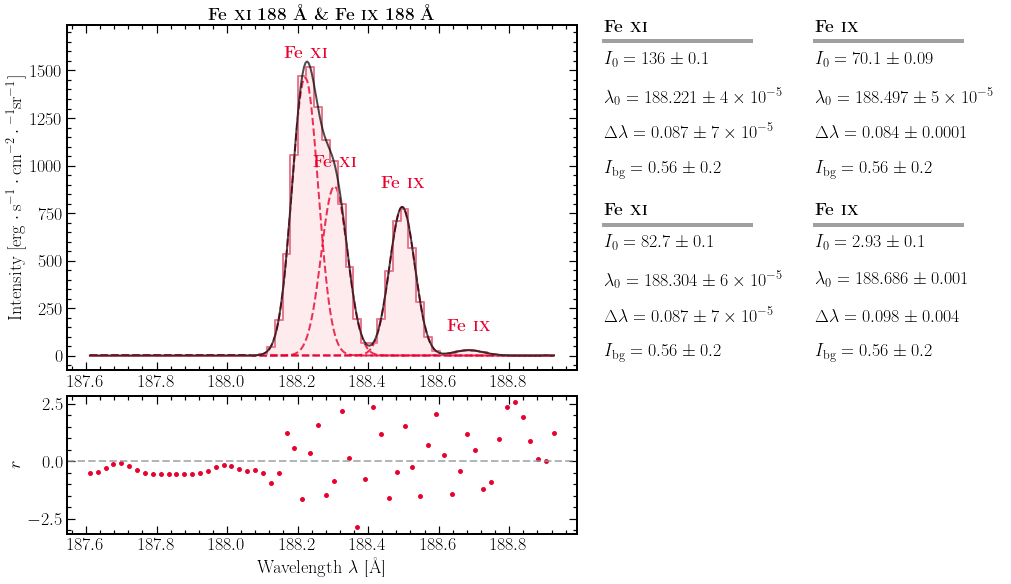

In [21]:
FeXI_188_slice = (955,1015)
wvl_FeXI_188 = wvl[FeXI_188_slice[0]:FeXI_188_slice[1]]
int_FeXI_188 = np.average(syn_spec[6:9,FeXI_188_slice[0]:FeXI_188_slice[1]],axis=0)

FeXI_188_fit_model = SpectrumFitSingle(data=int_FeXI_188,wvl=wvl_FeXI_188,err=None,
                                      same_width=[True,True,False,False],line_number=4,
                                      line_wvl_init=[188.2,188.29,188.49,188.68],
                                      int_max_init=[1400,800,800,50],fwhm_init=[0.08,0.08,0.08,0.08])
# FeXI_188_fit_model.plot(plot_fit=False,plot_params=False)
# FeXI_188_fit_model.run_HahnMC(n_chain=10000)
FeXI_188_fit_model.run_lse()
FeXI_188_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 188 \mbox{\AA} \& Fe \textsc{ix} 188 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",
                        r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{ix}}",r"\textbf{Fe \textsc{ix}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_188_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05498418 0.02716764 0.05270627]


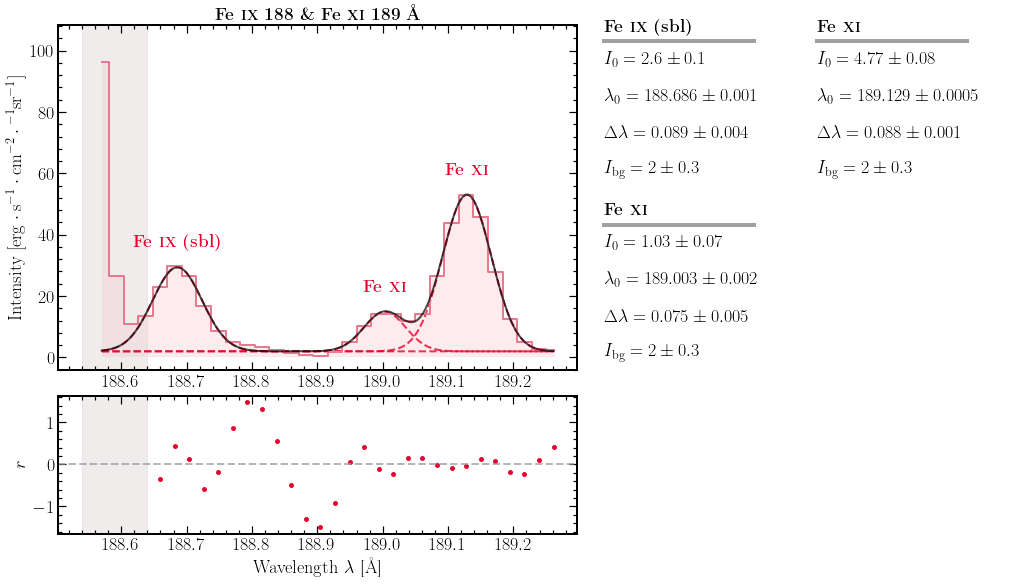

In [22]:
FeXI_188_189_slice = (998,1030)
wvl_FeXI_188_189 = wvl[FeXI_188_189_slice[0]:FeXI_188_189_slice[1]]
int_FeXI_188_189 = np.average(syn_spec[6:9,FeXI_188_189_slice[0]:FeXI_188_189_slice[1]],axis=0)

FeXI_188_189_fit_model = SpectrumFitSingle(data=int_FeXI_188_189,wvl=wvl_FeXI_188_189,err=None,
                                      same_width=False,line_number=3,line_wvl_init=[188.68,189.0,189.12],
                                      int_max_init=[40,20,80],fwhm_init=[0.08,0.08,0.08],mask=[[188.54,188.64]])
# FeXI_188_189_fit_model.plot(plot_fit=False,plot_params=False)
# FeXI_188_189_fit_model.run_HahnMC(n_chain=10000)
FeXI_188_189_fit_model.run_lse()
FeXI_188_189_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 188 \& Fe \textsc{xi} 189 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{ix} (sbl)}",r"\textbf{Fe \textsc{xi}}",
                                                                                r"\textbf{Fe \textsc{xi}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_188_189_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04362795 0.04837614]


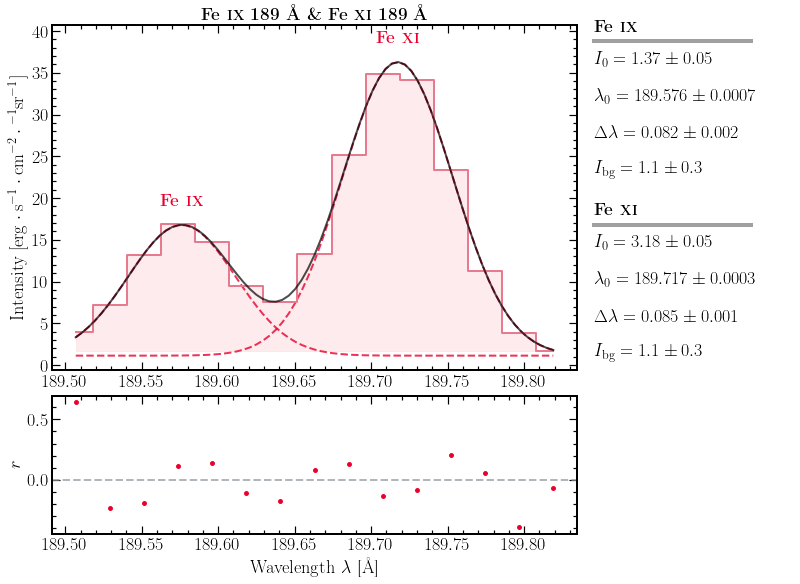

In [23]:
FeIX_FeXI_189_slice = (1040,1055)
wvl_FeIX_FeXI_189 = wvl[FeIX_FeXI_189_slice[0]:FeIX_FeXI_189_slice[1]]
int_FeIX_FeXI_189 = np.average(syn_spec[6:9,FeIX_FeXI_189_slice[0]:FeIX_FeXI_189_slice[1]],axis=0)

FeIX_FeXI_189_fit_model = SpectrumFitSingle(data=int_FeIX_FeXI_189,wvl=wvl_FeIX_FeXI_189,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[189.57,189.72],
                                      int_max_init=[20,30],fwhm_init=[0.08,0.08])
# FeIX_FeXI_189_fit_model.plot(plot_fit=False,plot_params=False)
# FeIX_FeXI_189_fit_model.run_HahnMC(n_chain=10000)
FeIX_FeXI_189_fit_model.run_lse()
FeIX_FeXI_189_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 189 \mbox{\AA} \& Fe \textsc{xi} 189 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{ix}}",r"\textbf{Fe \textsc{xi}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_FeXI_189_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04411807 0.04811652]


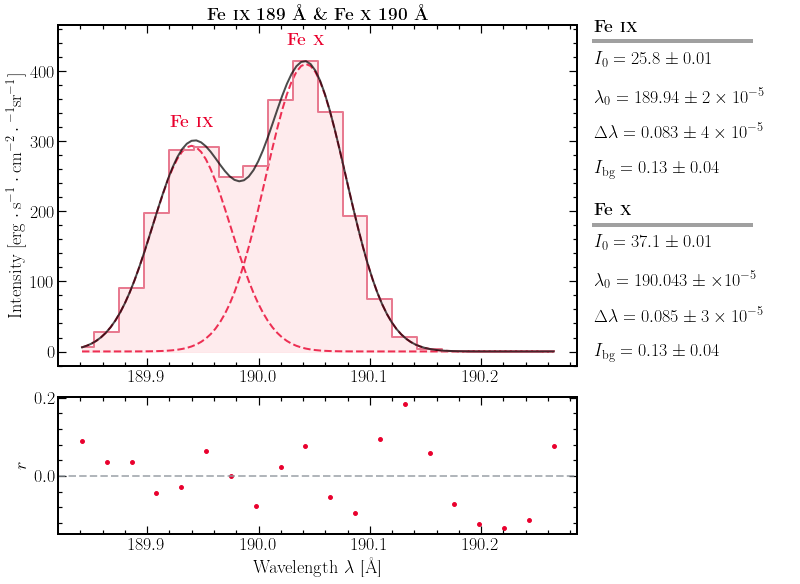

In [24]:
FeIX_189_FeX_190_slice = (1055,1075)
wvl_FeIX_189_FeX_190 = wvl[FeIX_189_FeX_190_slice[0]:FeIX_189_FeX_190_slice[1]]
int_FeIX_189_FeX_190 = np.average(syn_spec[6:9,FeIX_189_FeX_190_slice[0]:FeIX_189_FeX_190_slice[1]],axis=0)

FeIX_189_FeX_190_fit_model = SpectrumFitSingle(data=int_FeIX_189_FeX_190,wvl=wvl_FeIX_189_FeX_190,err=None,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[189.93,190.04],
                                      int_max_init=[300,300],
                                      fwhm_init=[0.08,0.08])
# FeIX_189_FeX_190_fit_model.plot(plot_fit=False,plot_params=False)
# FeIX_189_FeX_190_fit_model.run_HahnMC(n_chain=10000)
FeIX_189_FeX_190_fit_model.run_lse()
FeIX_189_FeX_190_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 189 \mbox{\AA} \& Fe \textsc{x} 190 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{ix}}",r"\textbf{Fe \textsc{x}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_189_FeX_190_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  0.05670226363909678


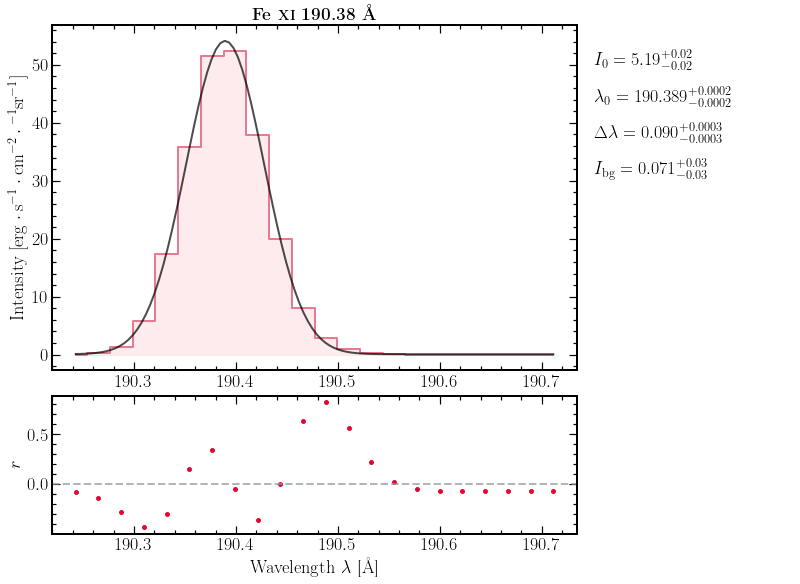

In [25]:
FeXI_190_slice = (1073,1095)
wvl_FeXI_190 = wvl[FeXI_190_slice[0]:FeXI_190_slice[1]]
int_FeXI_190 = np.average(syn_spec[6:9,FeXI_190_slice[0]:FeXI_190_slice[1]],axis=0)

FeXI_190_fit_model = SpectrumFitSingle(data=int_FeXI_190,wvl=wvl_FeXI_190,err=None,
                                      same_width=True,line_number=1,line_wvl_init=[190.37],
                                      int_max_init=[50],fwhm_init=[0.07])
# FeXI_190_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_190_fit_model.run_HahnMC(n_chain=10000)
# FeXI_190_fit_model.run_lse()
FeXI_190_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 190.38 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_190_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05199156]


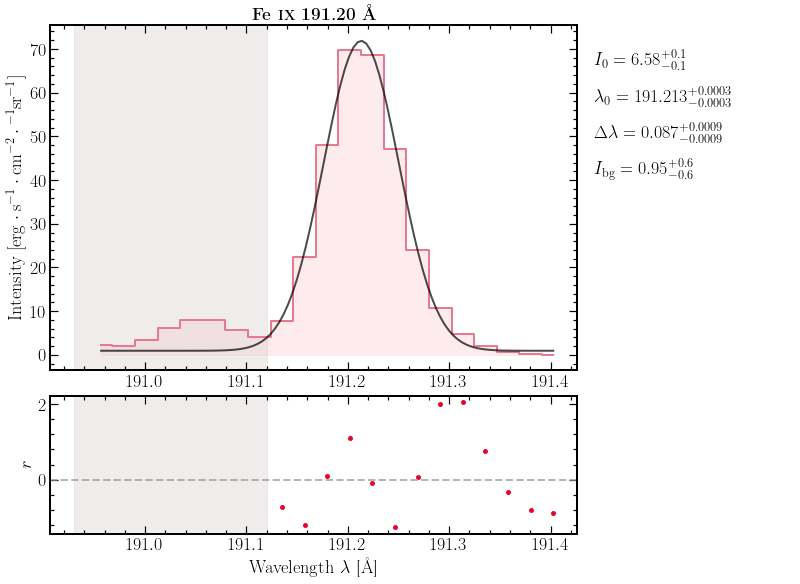

In [26]:
FeIX_191_slice = (1105,1126)
wvl_FeIX_191 = wvl[FeIX_191_slice[0]:FeIX_191_slice[1]]
int_FeIX_191 = np.average(syn_spec[6:9,FeIX_191_slice[0]:FeIX_191_slice[1]],axis=0)

FeIX_191_fit_model = SpectrumFitSingle(data=int_FeIX_191,wvl=wvl_FeIX_191,err=None,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[191.2],
                                      int_max_init=[100],
                                      fwhm_init=[0.08],mask=[[190.93,191.12]])
# FeIX_191_fit_model.plot(plot_fit=False,plot_params=False)
FeIX_191_fit_model.run_HahnMC(n_chain=10000)
# FeIX_191_fit_model.run_lse()
FeIX_191_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 191.20 \mbox{\AA}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_191_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after remMnIXing instrumental broadening:  [0.04450677]


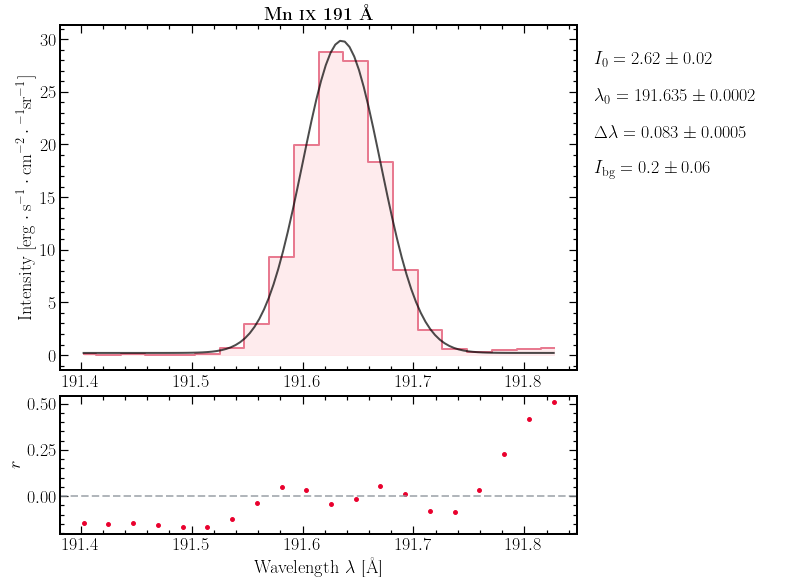

In [27]:
MnIX_191_slice = (1125,1145)
wvl_MnIX_191 = wvl[MnIX_191_slice[0]:MnIX_191_slice[1]]
int_MnIX_191 = np.average(syn_spec[6:9,MnIX_191_slice[0]:MnIX_191_slice[1]],axis=0)

MnIX_191_fit_model = SpectrumFitSingle(data=int_MnIX_191,wvl=wvl_MnIX_191,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[191.62],
                                      int_max_init=[30],fwhm_init=[0.08])
# MnIX_191_fit_model.plot(plot_fit=False,plot_params=False)
# MnIX_191_fit_model.run_HahnMC(n_chain=10000)
MnIX_191_fit_model.run_lse()
MnIX_191_fit_model.plot(plot_title=r"\textbf{Mn \textsc{ix} 191 \mbox{\AA}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after remMnIXing instrumental broadening: ",np.sqrt(MnIX_191_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05571869 0.05930191]


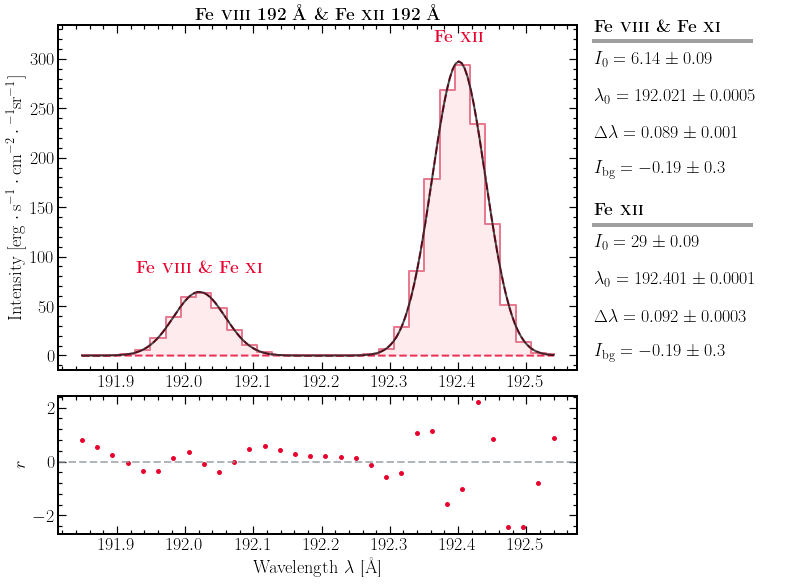

In [28]:
FeVIII_FeXI_192_slice = (1145,1177)
wvl_FeVIII_FeXI_192 = wvl[FeVIII_FeXI_192_slice[0]:FeVIII_FeXI_192_slice[1]]
int_FeVIII_FeXI_192 = np.average(syn_spec[6:9,FeVIII_FeXI_192_slice[0]:FeVIII_FeXI_192_slice[1]],axis=0)

FeVIII_FeXI_192_fit_model = SpectrumFitSingle(data=int_FeVIII_FeXI_192,wvl=wvl_FeVIII_FeXI_192,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[192.02,192.4],
                                      int_max_init=[70,250],fwhm_init=[0.08,0.08])
# FeVIII_FeXI_192_fit_model.plot(plot_fit=False,plot_params=False)
# FeVIII_FeXI_192_fit_model.run_HahnMC(n_chain=10000)
FeVIII_FeXI_192_fit_model.run_lse()
FeVIII_FeXI_192_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 192 \mbox{\AA} \& Fe \textsc{xii} 192 \mbox{\AA}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{viii} \& \textbf{Fe \textsc{xi}}}",
                                 r"\textbf{Fe \textsc{xii}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_FeXI_192_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04882225 0.05332373]


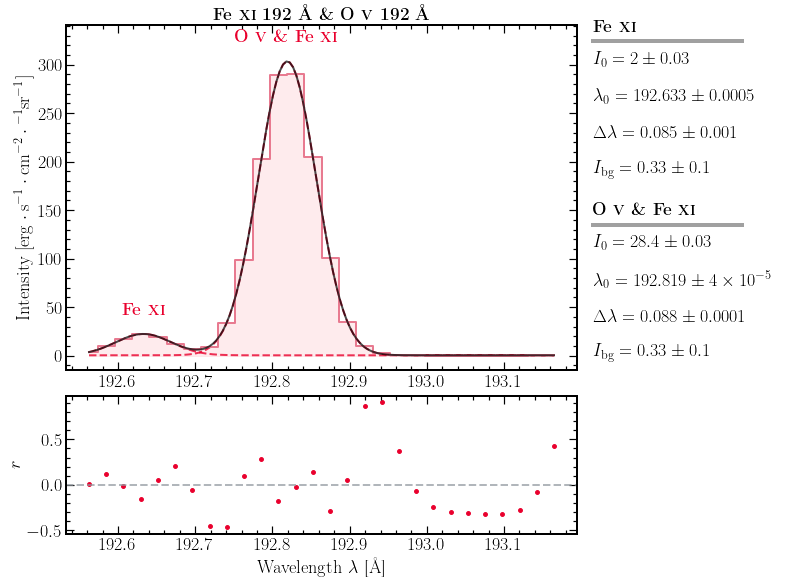

In [29]:
FeIX_OV_192_slice = (1177,1205)
wvl_FeIX_OV_192 = wvl[FeIX_OV_192_slice[0]:FeIX_OV_192_slice[1]]
int_FeIX_OV_192 = np.average(syn_spec[6:9,FeIX_OV_192_slice[0]:FeIX_OV_192_slice[1]],axis=0)

FeIX_OV_192_fit_model = SpectrumFitSingle(data=int_FeIX_OV_192,wvl=wvl_FeIX_OV_192,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[192.6,192.8],
                                      int_max_init=[20,250],fwhm_init=[0.08,0.08])
# FeIX_OV_192_fit_model.plot(plot_fit=False,plot_params=False)
# FeIX_OV_192_fit_model.run_HahnMC(n_chain=10000)
FeIX_OV_192_fit_model.run_lse()
FeIX_OV_192_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 192 \mbox{\AA} \& O \textsc{v} 192 \mbox{\AA} }",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",
                                                                            r"\textbf{O \textsc{v} \& Fe \textsc{xi}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_OV_192_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05940456 0.04695395]


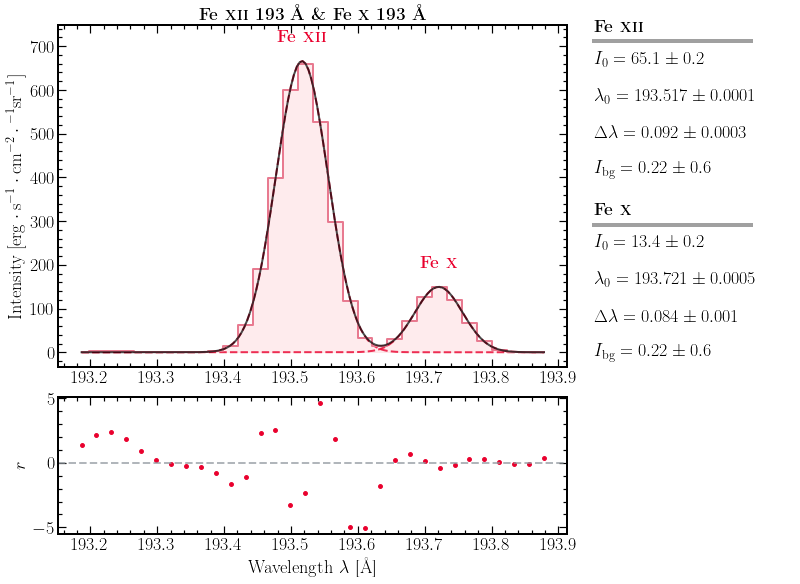

In [30]:
FeXII_FeX_193_slice = (1205,1237)
wvl_FeXII_FeX_193 = wvl[FeXII_FeX_193_slice[0]:FeXII_FeX_193_slice[1]]
int_FeXII_FeX_193 = np.average(syn_spec[6:9,FeXII_FeX_193_slice[0]:FeXII_FeX_193_slice[1]],axis=0)

FeXII_FeX_193_fit_model = SpectrumFitSingle(data=int_FeXII_FeX_193,wvl=wvl_FeXII_FeX_193,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[193.53,193.72],
                                      int_max_init=[600,150],fwhm_init=[0.08,0.08])
# FeXII_FeX_193_fit_model.plot(plot_fit=False,plot_params=False)
# FeXII_FeX_193_fit_model.run_HahnMC(n_chain=10000)
FeXII_FeX_193_fit_model.run_lse()
FeXII_FeX_193_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 193 \mbox{\AA} \& Fe \textsc{x} 193 \mbox{\AA} }",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xii}}",r"\textbf{Fe \textsc{x}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_FeX_193_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04188652 0.05036209]


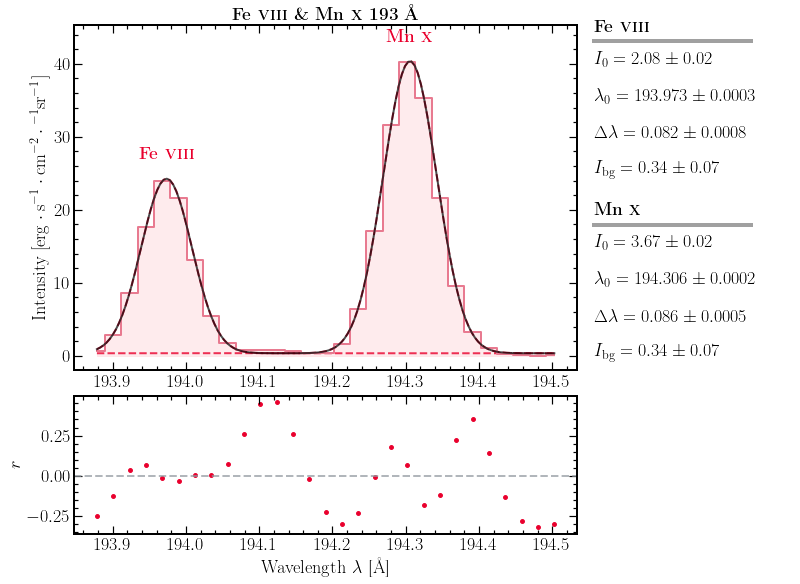

In [31]:
FeVIII_193_slice = (1236,1265)
wvl_FeVIII_193 = wvl[FeVIII_193_slice[0]:FeVIII_193_slice[1]]
int_FeVIII_193 = np.average(syn_spec[6:9,FeVIII_193_slice[0]:FeVIII_193_slice[1]],axis=0)

FeVIII_193_fit_model = SpectrumFitSingle(data=int_FeVIII_193,wvl=wvl_FeVIII_193,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[193.98,194.3],
                                      int_max_init=[30,40],fwhm_init=[0.08,0.08])
# FeVIII_193_fit_model.plot(plot_fit=False,plot_params=False)
# FeVIII_193_fit_model.run_HahnMC(n_chain=10000)
FeVIII_193_fit_model.run_lse()
FeVIII_193_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} \& Mn \textsc{x} 193 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{viii}}",r"\textbf{Mn \textsc{x}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_193_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.0453384]


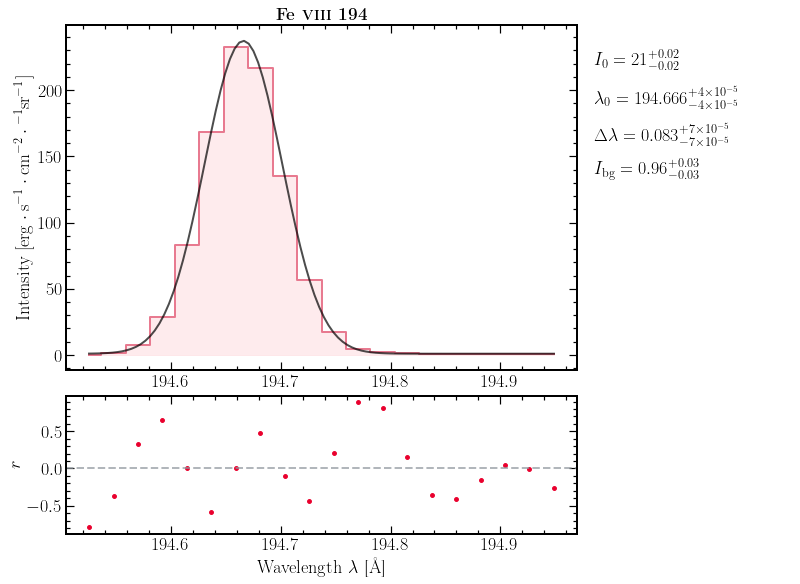

In [32]:
FeVIII_194_slice = (1265,1285)
wvl_FeVIII_194 = wvl[FeVIII_194_slice[0]:FeVIII_194_slice[1]]
int_FeVIII_194 = np.average(syn_spec[6:9,FeVIII_194_slice[0]:FeVIII_194_slice[1]],axis=0)

FeVIII_194_fit_model = SpectrumFitSingle(data=int_FeVIII_194,wvl=wvl_FeVIII_194,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[194.67],
                                      int_max_init=[300],fwhm_init=[0.08])
# FeVIII_194_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_194_fit_model.run_HahnMC(n_chain=10000)
# FeVIII_194_fit_model.run_lse()
FeVIII_194_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 194",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_194_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06126098]


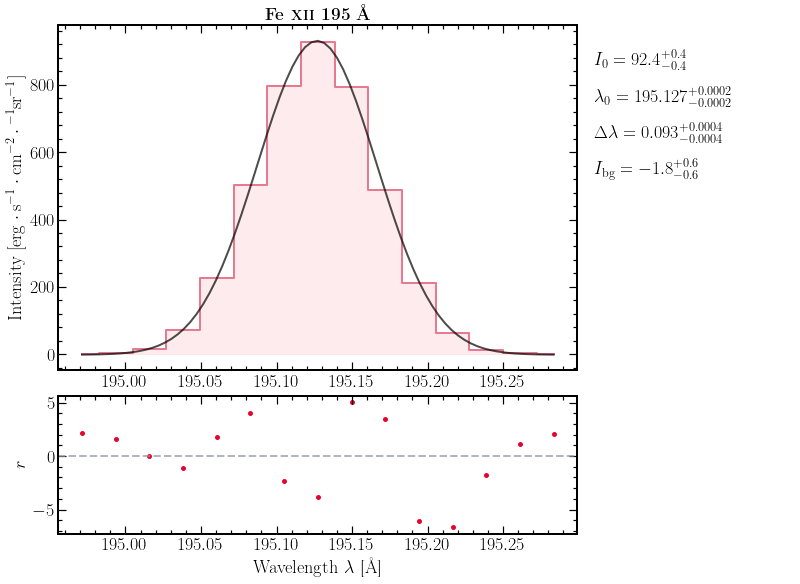

In [33]:
FeXII_195_slice = (1285,1300)
wvl_FeXII_195 = wvl[FeXII_195_slice[0]:FeXII_195_slice[1]]
int_FeXII_195 = np.average(syn_spec[6:9,FeXII_195_slice[0]:FeXII_195_slice[1]],axis=0)

FeXII_195_fit_model = SpectrumFitSingle(data=int_FeXII_195,wvl=wvl_FeXII_195,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[195.12],
                                      int_max_init=[800],fwhm_init=[0.08])
# FeXII_195_fit_model.plot(plot_fit=False,plot_params=False)
FeXII_195_fit_model.run_HahnMC(n_chain=10000)
# FeXII_195_fit_model.run_lse()
FeXII_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_195_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


FWHM after removing instrumental broadening:  [0.05892785        nan]


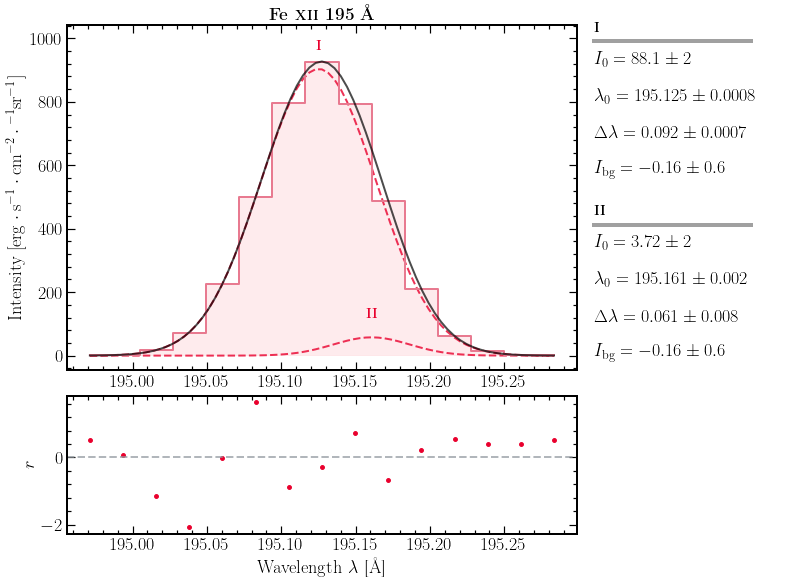

In [34]:
FeXII_195_slice = (1285,1300)
wvl_FeXII_195 = wvl[FeXII_195_slice[0]:FeXII_195_slice[1]]
int_FeXII_195 = np.average(syn_spec[6:9,FeXII_195_slice[0]:FeXII_195_slice[1]],axis=0)

FeXII_195_fit_model = SpectrumFitSingle(data=int_FeXII_195,wvl=wvl_FeXII_195,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[195.12,195.179],
                                      int_max_init=[800,50],fwhm_init=[0.08,0.08])
# FeXII_195_fit_model.plot(plot_fit=False,plot_params=False)
#FeXII_195_fit_model.run_HahnMC(n_chain=10000)
FeXII_195_fit_model.run_lse()
FeXII_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_195_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04540652 0.04735111]


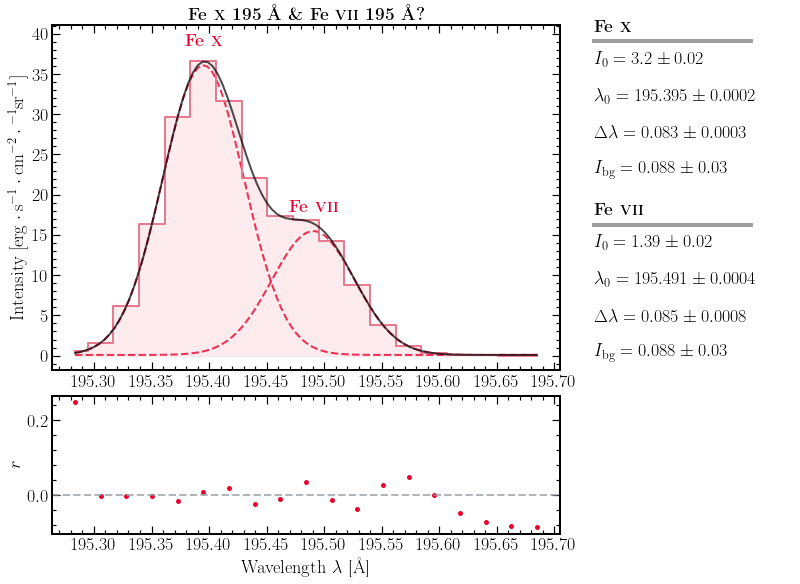

In [35]:
FeX_195_slice = (1299,1318)
wvl_FeX_195 = wvl[FeX_195_slice[0]:FeX_195_slice[1]]
int_FeX_195 = np.average(syn_spec[6:9,FeX_195_slice[0]:FeX_195_slice[1]],axis=0)

FeX_195_fit_model = SpectrumFitSingle(data=int_FeX_195,wvl=wvl_FeX_195,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[195.4,195.5],
                                      int_max_init=[50,25],fwhm_init=[0.08,0.08])
# FeX_195_fit_model.plot(plot_fit=False,plot_params=False)
# FeX_195_fit_model.run_HahnMC(n_chain=10000)
FeX_195_fit_model.run_lse()
FeX_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 195 \mbox{\AA} \& Fe \textsc{vii} 195 \mbox{\AA}?}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{x}}",r"\textbf{Fe \textsc{vii}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_195_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.05008984        nan]


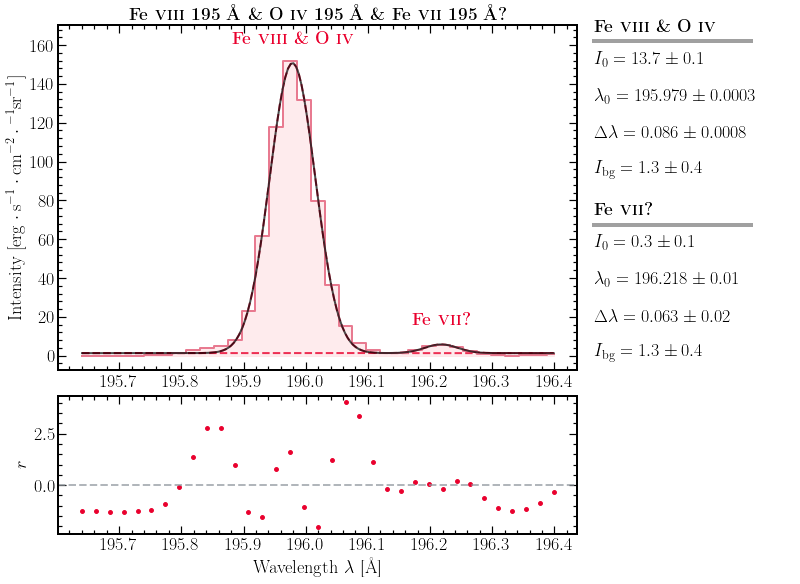

In [36]:
FeVIII_195_slice = (1315,1350)
wvl_FeVIII_195 = wvl[FeVIII_195_slice[0]:FeVIII_195_slice[1]]
int_FeVIII_195 = np.average(syn_spec[6:9,FeVIII_195_slice[0]:FeVIII_195_slice[1]],axis=0)

FeVIII_195_fit_model = SpectrumFitSingle(data=int_FeVIII_195,wvl=wvl_FeVIII_195,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[196.0,196.23],
                                      int_max_init=[200,20],fwhm_init=[0.08,0.08])
# FeVIII_195_fit_model.plot(plot_fit=False,plot_params=False)
# FeVIII_195_fit_model.run_HahnMC(n_chain=10000)
FeVIII_195_fit_model.run_lse()
FeVIII_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 195 \mbox{\AA} \& O \textsc{iv} 195 \mbox{\AA} \& Fe \textsc{vii} 195 \mbox{\AA}?}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{viii} \& O \textsc{iv}}",
                                                                                    r"\textbf{Fe \textsc{vii}?}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_195_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04493159]


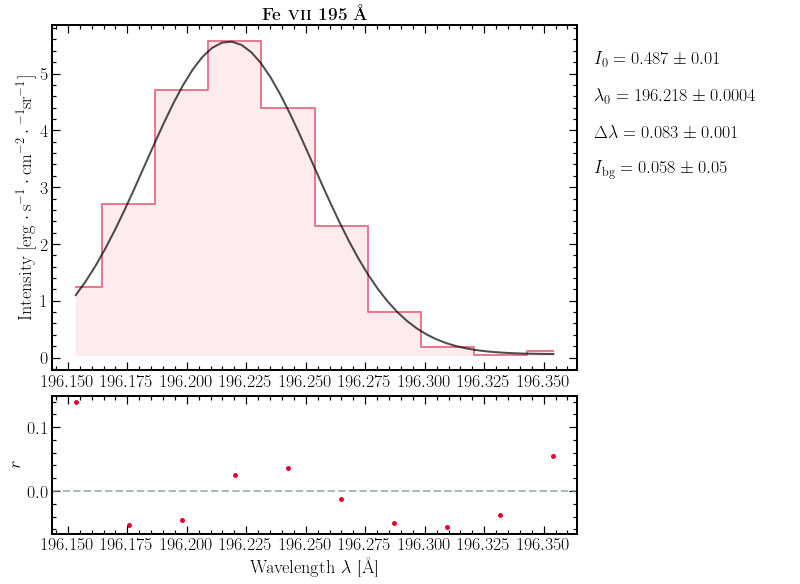

In [37]:
FeVII_195_slice = (1338,1348)
wvl_FeVII_195 = wvl[FeVII_195_slice[0]:FeVII_195_slice[1]]
int_FeVII_195 = np.average(syn_spec[6:9,FeVII_195_slice[0]:FeVII_195_slice[1]],axis=0)

FeVII_195_fit_model = SpectrumFitSingle(data=int_FeVII_195,wvl=wvl_FeVII_195,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[196.23],
                                      int_max_init=[20],fwhm_init=[0.08])
# FeVII_195_fit_model.plot(plot_fit=False,plot_params=False)
# FeVII_195_fit_model.run_HahnMC(n_chain=10000)
FeVII_195_fit_model.run_lse()
FeVII_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{vii} 195 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVII_195_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.00862464 0.10426172 0.04985719]


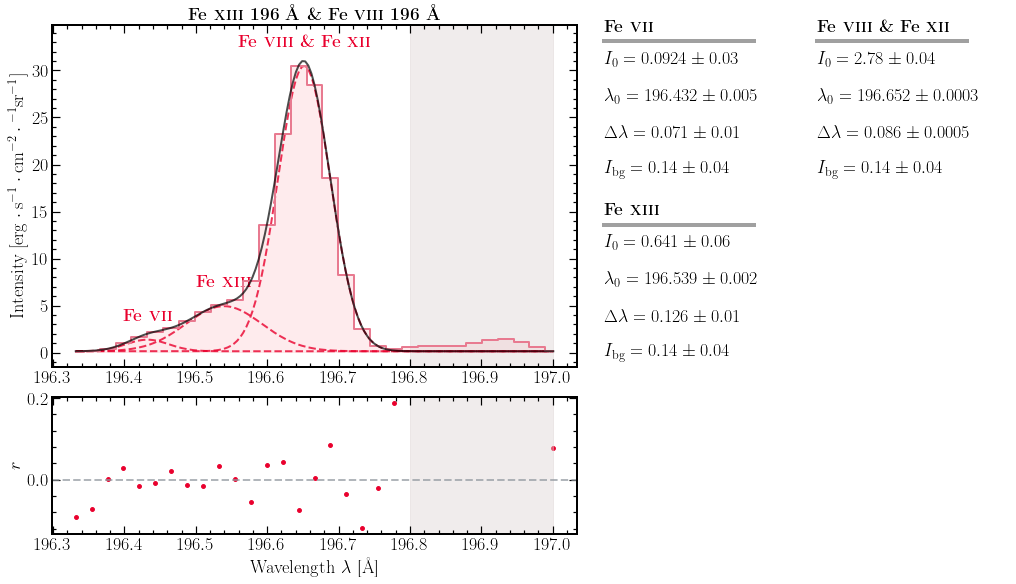

In [38]:
FeXIII_FeVIII_196_slice = (1346,1377)
wvl_FeXIII_FeVIII_196 = wvl[FeXIII_FeVIII_196_slice[0]:FeXIII_FeVIII_196_slice[1]]
int_FeXIII_FeVIII_196 = np.average(syn_spec[6:9,FeXIII_FeVIII_196_slice[0]:FeXIII_FeVIII_196_slice[1]],axis=0)

FeXIII_FeVIII_196_fit_model = SpectrumFitSingle(data=int_FeXIII_FeVIII_196,wvl=wvl_FeXIII_FeVIII_196,err=None,
                                      same_width=False,line_number=3,line_wvl_init=[196.44,196.53,196.64],
                                      int_max_init=[5,5,30],fwhm_init=[0.08,0.08,0.08],mask=[[196.8,197.0]])
# FeXIII_FeVIII_196_fit_model.plot(plot_fit=False,plot_params=False)
# FeXIII_FeVIII_196_fit_model.run_HahnMC(n_chain=10000)
FeXIII_FeVIII_196_fit_model.run_lse()
FeXIII_FeVIII_196_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xiii} 196 \mbox{\AA} \& Fe \textsc{viii} 196 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{vii}}",r"\textbf{Fe \textsc{xiii}}",
                                 r"\textbf{Fe \textsc{viii} \& Fe \textsc{xii}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXIII_FeVIII_196_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04710642 0.0503762 ]


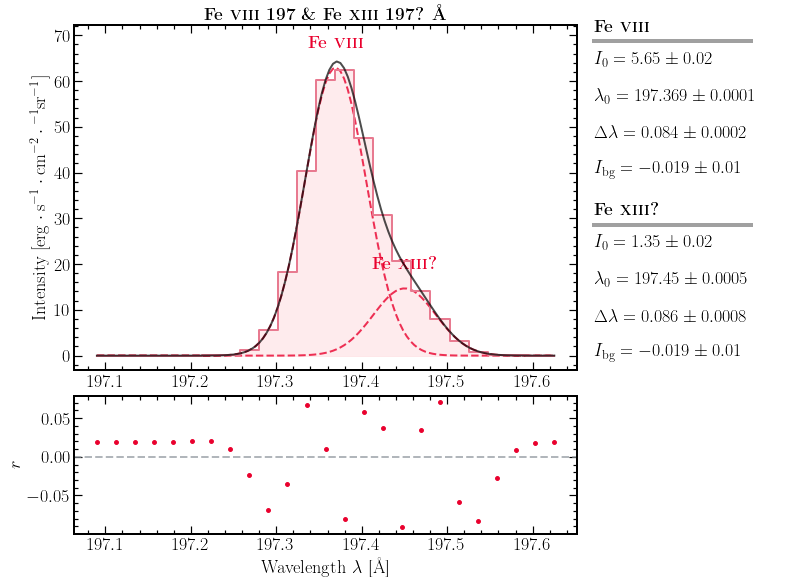

In [39]:
FeVIII_197_slice = (1380,1405)
wvl_FeVIII_197 = wvl[FeVIII_197_slice[0]:FeVIII_197_slice[1]]
int_FeVIII_197 = np.average(syn_spec[6:9,FeVIII_197_slice[0]:FeVIII_197_slice[1]],axis=0)

FeVIII_197_fit_model = SpectrumFitSingle(data=int_FeVIII_197,wvl=wvl_FeVIII_197,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[197.35,197.45],
                                      int_max_init=[80,15],fwhm_init=[0.08,0.08])
# FeVIII_197_fit_model.plot(plot_fit=False,plot_params=False)
# FeVIII_197_fit_model.run_HahnMC(n_chain=10000)
FeVIII_197_fit_model.run_lse()
FeVIII_197_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 197 \& Fe \textsc{xiii} 197? \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{viii}}",r"\textbf{Fe \textsc{xiii}?}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_197_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04668013]


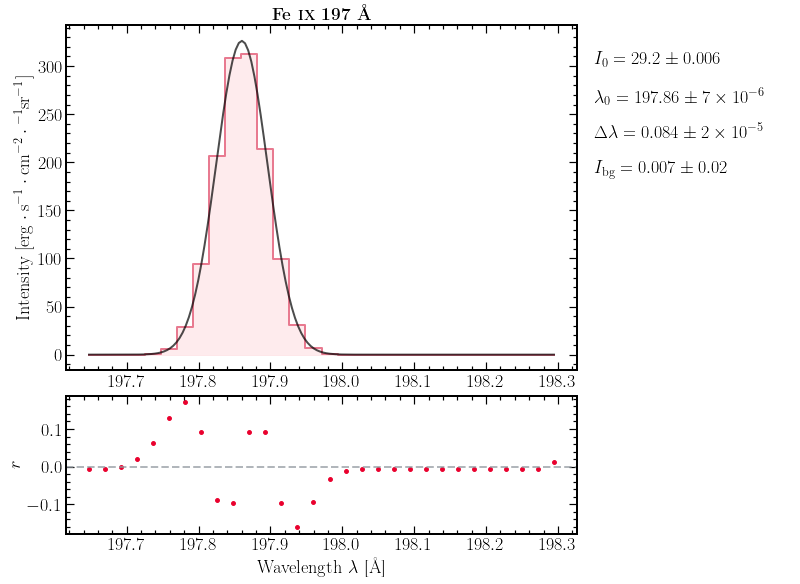

In [40]:
FeIX_197_slice = (1405,1435)
wvl_FeIX_197 = wvl[FeIX_197_slice[0]:FeIX_197_slice[1]]
int_FeIX_197 = np.average(syn_spec[6:9,FeIX_197_slice[0]:FeIX_197_slice[1]],axis=0)

FeIX_197_fit_model = SpectrumFitSingle(data=int_FeIX_197,wvl=wvl_FeIX_197,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[197.85],
                                      int_max_init=[350],fwhm_init=[0.08])
# FeIX_197_fit_model.plot(plot_fit=False,plot_params=False)
FeIX_197_fit_model.run_HahnMC(n_chain=10000)
# FeIX_197_fit_model.run_lse()
FeIX_197_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 197 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_197_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.0539466  0.05289191]


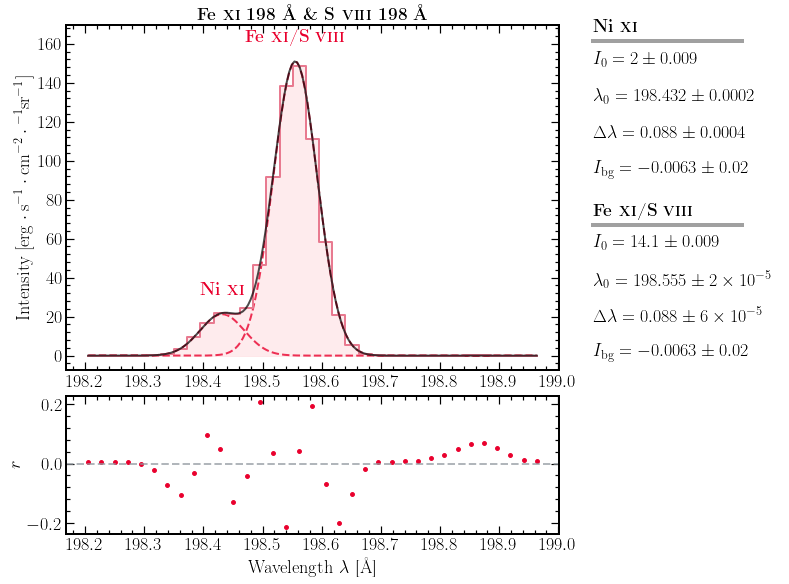

In [41]:
FeXI_SVIII_198_slice = (1430,1465)
wvl_FeXI_SVIII_198 = wvl[FeXI_SVIII_198_slice[0]:FeXI_SVIII_198_slice[1]]
int_FeXI_SVIII_198 = np.average(syn_spec[6:9,FeXI_SVIII_198_slice[0]:FeXI_SVIII_198_slice[1]],axis=0)

FeXI_SVIII_198_fit_model = SpectrumFitSingle(data=int_FeXI_SVIII_198,wvl=wvl_FeXI_SVIII_198,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[198.42,198.5],
                                      int_max_init=[25,150],fwhm_init=[0.08,0.08])
# FeXI_SVIII_198_fit_model.plot(plot_fit=False,plot_params=False)
# FeXI_SVIII_198_fit_model.run_HahnMC(n_chain=10000)
FeXI_SVIII_198_fit_model.run_lse()
FeXI_SVIII_198_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 198 \mbox{\AA} \& S \textsc{viii} 198 \mbox{\AA} }",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Ni \textsc{xi}}",
                                 r"\textbf{Fe \textsc{xi}/S \textsc{viii}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_SVIII_198_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05323966]


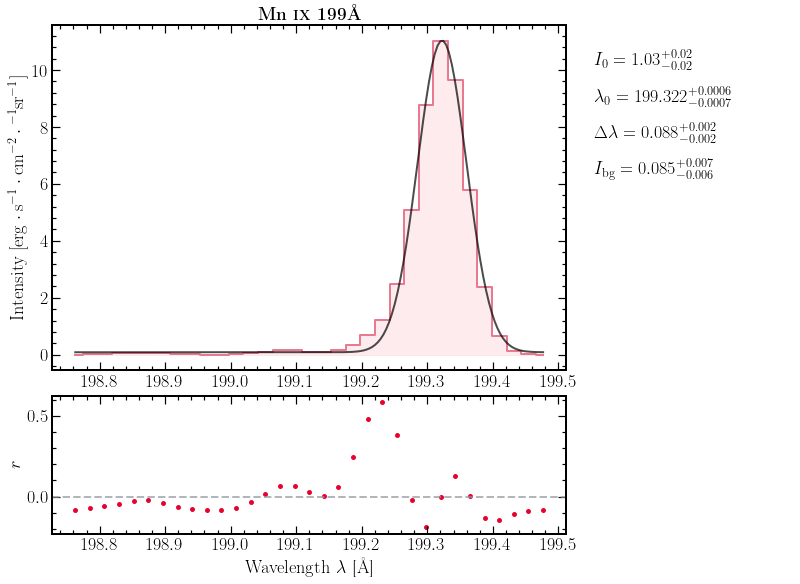

In [42]:
MnIX_199_slice = (1455,1488)
wvl_MnIX_199 = wvl[MnIX_199_slice[0]:MnIX_199_slice[1]]
int_MnIX_199 = np.average(syn_spec[6:9,MnIX_199_slice[0]:MnIX_199_slice[1]],axis=0)

MnIX_199_fit_model = SpectrumFitSingle(data=int_MnIX_199,wvl=wvl_MnIX_199,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[199.3],
                                      int_max_init=[12],fwhm_init=[0.08])
# MnIX_199_fit_model.plot(plot_fit=False,plot_params=False)
MnIX_199_fit_model.run_HahnMC(n_chain=10000)
# MnIX_199_fit_model.run_lse()
MnIX_199_fit_model.plot(plot_title=r"\textbf{Mn \textsc{ix} 199\mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(MnIX_199_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.0481496  0.09400309]


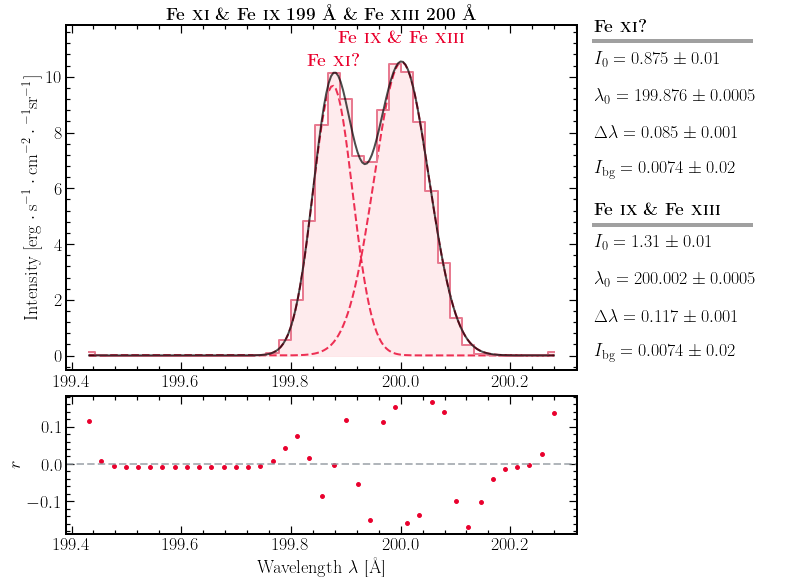

In [43]:
FeIX_199_slice = (1485,1524)
wvl_FeIX_199 = wvl[FeIX_199_slice[0]:FeIX_199_slice[1]]
int_FeIX_199 = np.average(syn_spec[6:9,FeIX_199_slice[0]:FeIX_199_slice[1]],axis=0)

FeIX_199_fit_model = SpectrumFitSingle(data=int_FeIX_199,wvl=wvl_FeIX_199,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[199.87,200.],
                                      int_max_init=[10,12],fwhm_init=[0.08,0.08])
# FeIX_199_fit_model.plot(plot_fit=False,plot_params=False)
# FeIX_199_fit_model.run_HahnMC(n_chain=10000)
FeIX_199_fit_model.run_lse()
FeIX_199_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& Fe \textsc{ix} 199 \mbox{\AA} \& Fe \textsc{xiii} 200 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}?}",r"\textbf{Fe \textsc{ix} \& Fe \textsc{xiii}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_199_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06751313]


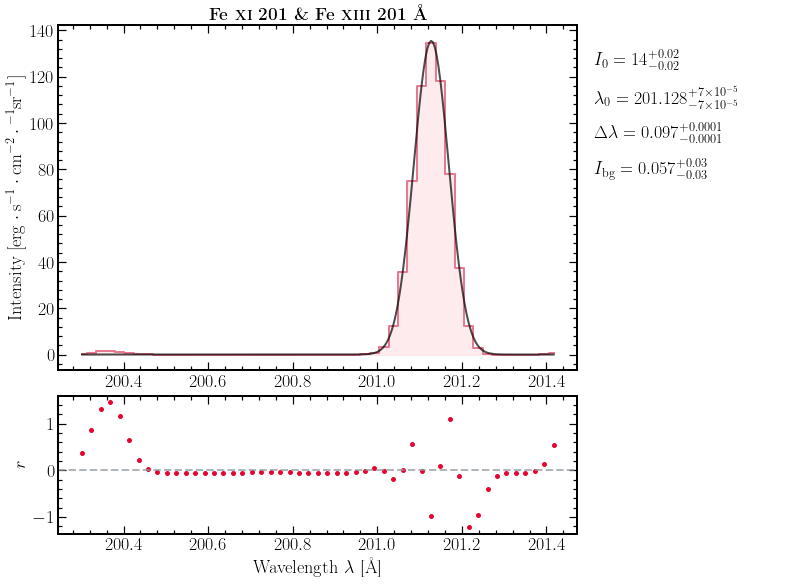

In [44]:
FeXI_FeXIII_201_slice = (1524,1575)
wvl_FeXI_FeXIII_201 = wvl[FeXI_FeXIII_201_slice[0]:FeXI_FeXIII_201_slice[1]]
int_FeXI_FeXIII_201 = np.average(syn_spec[6:9,FeXI_FeXIII_201_slice[0]:FeXI_FeXIII_201_slice[1]],axis=0)

FeXI_FeXIII_201_fit_model = SpectrumFitSingle(data=int_FeXI_FeXIII_201,wvl=wvl_FeXI_FeXIII_201,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[201.1],
                                      int_max_init=[120],fwhm_init=[0.08])
# FeXI_FeXIII_201_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_FeXIII_201_fit_model.run_HahnMC(n_chain=10000)
# FeXI_FeXIII_201_fit_model.run_lse()
FeXI_FeXIII_201_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 201 \& Fe \textsc{xiii} 201 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeXIII_201_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04847156 0.05093955 0.09831096]


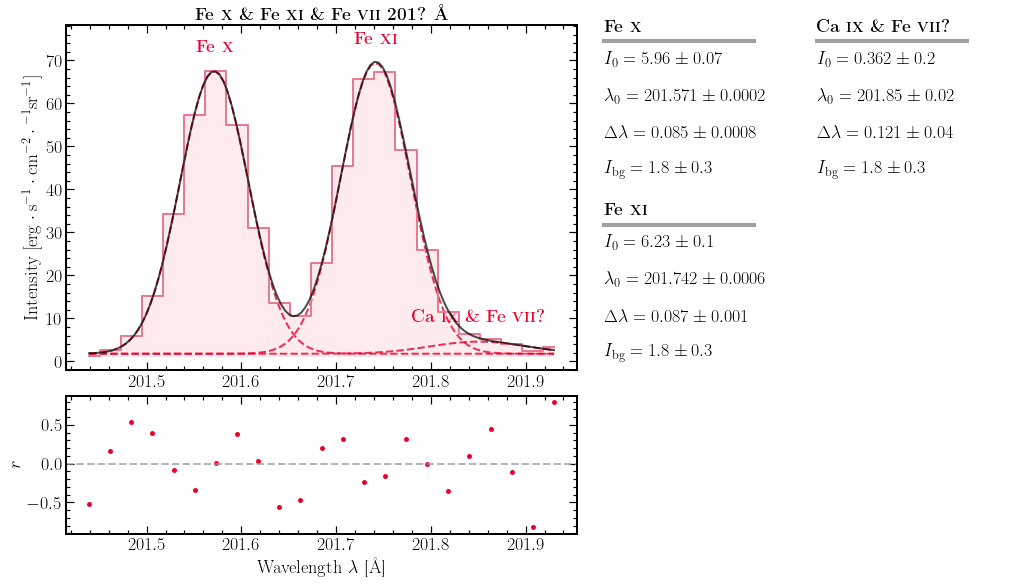

In [45]:
FeX_FeXI_FeVII_201_slice = (1575,1598)
wvl_FeX_FeXI_FeVII_201 = wvl[FeX_FeXI_FeVII_201_slice[0]:FeX_FeXI_FeVII_201_slice[1]]
int_FeX_FeXI_FeVII_201 = np.average(syn_spec[6:9,FeX_FeXI_FeVII_201_slice[0]:FeX_FeXI_FeVII_201_slice[1]],axis=0)

FeX_FeXI_FeVII_201_fit_model = SpectrumFitSingle(data=int_FeX_FeXI_FeVII_201,wvl=wvl_FeX_FeXI_FeVII_201,err=None,
                                      same_width=False,line_number=3,line_wvl_init=[201.55,201.75,201.85],
                                      int_max_init=[70,60,10],fwhm_init=[0.08,0.08,0.08])
# FeX_FeXI_FeVII_201_fit_model.plot(plot_fit=False,plot_params=False)
# FeX_FeXI_FeVII_201_fit_model.run_HahnMC(n_chain=10000)
FeX_FeXI_FeVII_201_fit_model.run_lse()
FeX_FeXI_FeVII_201_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} \& Fe \textsc{xi} \& Fe \textsc{vii} 201? \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{x}}",r"\textbf{Fe \textsc{xi}}",
                        r"\textbf{Ca \textsc{ix} \& Fe \textsc{vii}?}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_FeXI_FeVII_201_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06905184]


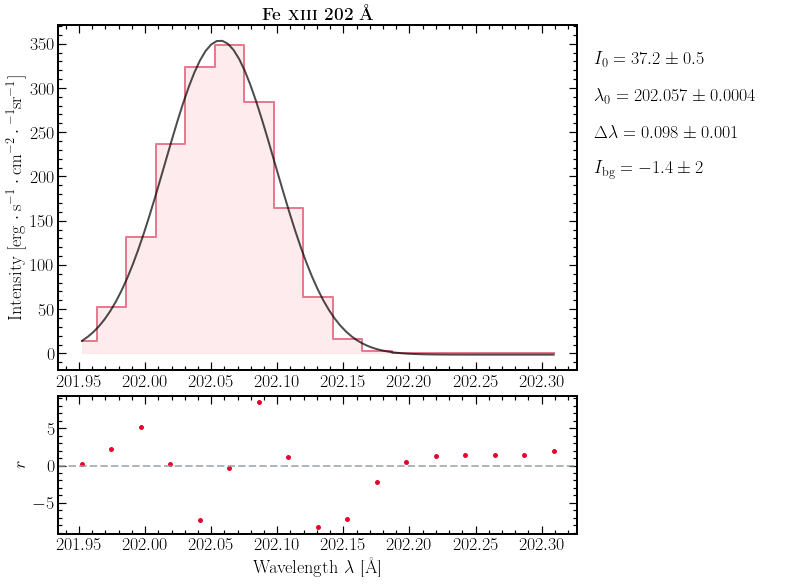

In [46]:
FeXIII_201_slice = (1598,1615)
wvl_FeXIII_201 = wvl[FeXIII_201_slice[0]:FeXIII_201_slice[1]]
int_FeXIII_201 = np.average(syn_spec[6:9,FeXIII_201_slice[0]:FeXIII_201_slice[1]],axis=0)

FeXIII_201_fit_model = SpectrumFitSingle(data=int_FeXIII_201,wvl=wvl_FeXIII_201,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[202.05],
                                      int_max_init=[350],fwhm_init=[0.08])
# FeXIII_201_fit_model.plot(plot_fit=False,plot_params=False)
FeXIII_201_fit_model.run_HahnMC(n_chain=10000)
# FeXIII_201_fit_model.run_lse()
FeXIII_201_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xiii} 202 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXIII_201_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05533733 0.05144838 0.05680895 0.04410333 0.05214343]


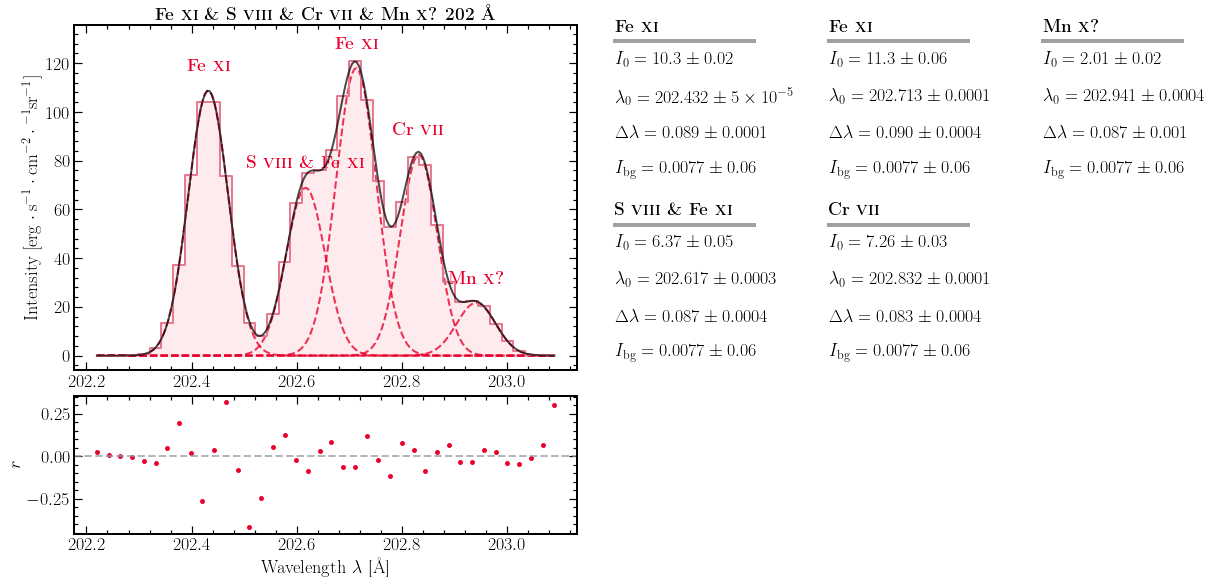

In [47]:
SVIII_202_slice = (1610,1650)
wvl_SVIII_202 = wvl[SVIII_202_slice[0]:SVIII_202_slice[1]]
int_SVIII_202 = np.average(syn_spec[6:9,SVIII_202_slice[0]:SVIII_202_slice[1]],axis=0)

SVIII_202_fit_model = SpectrumFitSingle(data=int_SVIII_202,wvl=wvl_SVIII_202,err=None,
                                      same_width=False,line_number=5,line_wvl_init=[202.4,202.6,202.7,202.82,202.9],
                                      int_max_init=[100,80,100,120,20],fwhm_init=[0.08,0.08,0.08,0.08,0.08])
# SVIII_202_fit_model.plot(plot_fit=False,plot_params=False)
# SVIII_202_fit_model.run_HahnMC(n_chain=10000)
SVIII_202_fit_model.run_lse()
SVIII_202_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& S \textsc{viii}  \& Cr \textsc{vii} \& Mn \textsc{x}? 202 \mbox{\AA} }",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption = [r"\textbf{Fe \textsc{xi}}",r"\textbf{S \textsc{viii} \& Fe \textsc{xi}}",
                        r"\textbf{Fe \textsc{xi}}",r"\textbf{Cr \textsc{vii}}",r"\textbf{Mn \textsc{x}?}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SVIII_202_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.07726267 0.06835081]


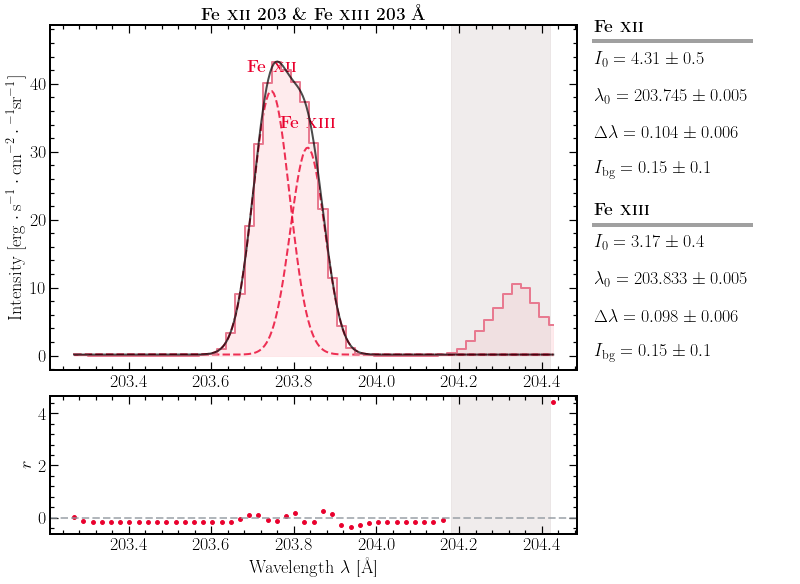

In [48]:
FeXII_FeXIII_202_slice = (1657,1710)
wvl_FeXII_FeXIII_202 = wvl[FeXII_FeXIII_202_slice[0]:FeXII_FeXIII_202_slice[1]]
int_FeXII_FeXIII_202 = np.average(syn_spec[6:9,FeXII_FeXIII_202_slice[0]:FeXII_FeXIII_202_slice[1]],axis=0)

FeXII_FeXIII_202_fit_model = SpectrumFitSingle(data=int_FeXII_FeXIII_202,wvl=wvl_FeXII_FeXIII_202,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[203.73,203.82],
                                      int_max_init=[40,40],fwhm_init=[0.08,0.08],mask=[[204.18,204.42]])
# FeXII_FeXIII_202_fit_model.plot(plot_fit=False,plot_params=False)
# FeXII_FeXIII_202_fit_model.run_HahnMC(n_chain=10000)
FeXII_FeXIII_202_fit_model.run_lse()
FeXII_FeXIII_202_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 203 \& Fe \textsc{xiii} 203 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xii}}",r"\textbf{Fe \textsc{xiii}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_FeXIII_202_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.04305915 0.07219913]


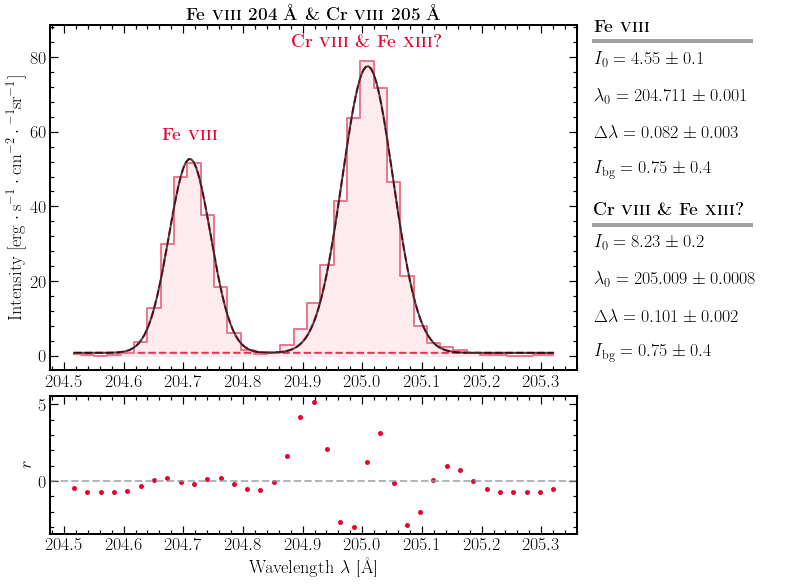

In [49]:
FeVIII_204_CrVIII_slice = (1713,1750)
wvl_FeVIII_204_CrVIII = wvl[FeVIII_204_CrVIII_slice[0]:FeVIII_204_CrVIII_slice[1]]
int_FeVIII_204_CrVIII = np.average(syn_spec[6:9,FeVIII_204_CrVIII_slice[0]:FeVIII_204_CrVIII_slice[1]],axis=0)

FeVIII_204_CrVIII_fit_model = SpectrumFitSingle(data=int_FeVIII_204_CrVIII,wvl=wvl_FeVIII_204_CrVIII,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[204.7,205],
                                      int_max_init=[80,100],fwhm_init=[0.08,0.08])
# FeVIII_204_CrVIII_fit_model.plot(plot_fit=False,plot_params=False)
# FeVIII_204_CrVIII_fit_model.run_HahnMC(n_chain=10000)
FeVIII_204_CrVIII_fit_model.run_lse()
FeVIII_204_CrVIII_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 204 \mbox{\AA} \& Cr \textsc{viii} 205 \mbox{\AA} }",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{viii}}",
                        r"\textbf{Cr \textsc{viii} \& Fe \textsc{xiii}?}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_204_CrVIII_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05093781]


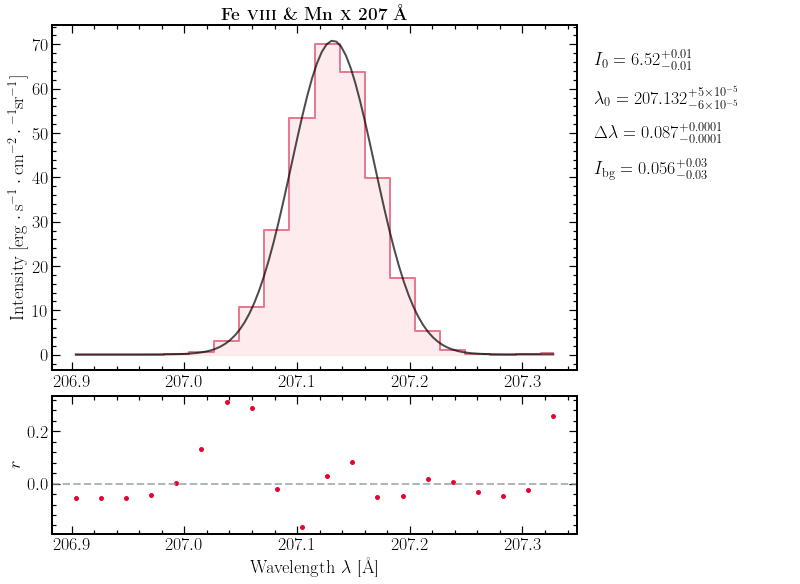

In [50]:
FeVIII_207_slice = (1820,1840)
wvl_FeVIII_207 = wvl[FeVIII_207_slice[0]:FeVIII_207_slice[1]]
int_FeVIII_207 = np.average(syn_spec[6:9,FeVIII_207_slice[0]:FeVIII_207_slice[1]],axis=0)

FeVIII_207_fit_model = SpectrumFitSingle(data=int_FeVIII_207,wvl=wvl_FeVIII_207,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[207.1],
                                      int_max_init=[100],fwhm_init=[0.08])
# FeVIII_207_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_207_fit_model.run_HahnMC(n_chain=10000)
# FeVIII_207_fit_model.run_lse()
FeVIII_207_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} \& Mn \textsc{x} 207 \mbox{\AA} }",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_207_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05147997]


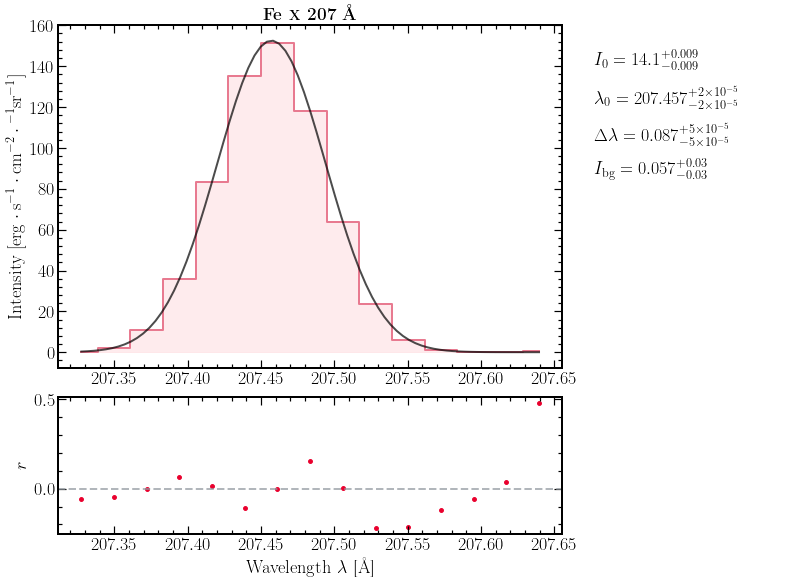

In [51]:
FeX_207_slice = (1839,1854)
wvl_FeX_207 = wvl[FeX_207_slice[0]:FeX_207_slice[1]]
int_FeX_207 = np.average(syn_spec[6:9,FeX_207_slice[0]:FeX_207_slice[1]],axis=0)

FeX_207_fit_model = SpectrumFitSingle(data=int_FeX_207,wvl=wvl_FeX_207,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[207.45],
                                      int_max_init=[160],fwhm_init=[0.08])
# FeX_207_fit_model.plot(plot_fit=False,plot_params=False)
FeX_207_fit_model.run_HahnMC(n_chain=10000)
# FeX_207_fit_model.run_lse()
FeX_207_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 207 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_207_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06409072 0.05231469]


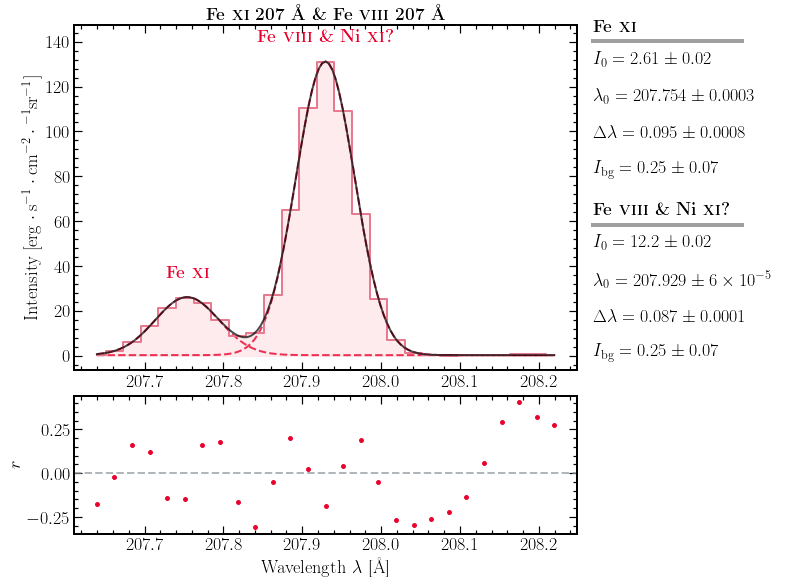

In [52]:
FeXI_FeVIII_207_slice = (1853,1880)
wvl_FeXI_FeVIII_207 = wvl[FeXI_FeVIII_207_slice[0]:FeXI_FeVIII_207_slice[1]]
int_FeXI_FeVIII_207 = np.average(syn_spec[6:9,FeXI_FeVIII_207_slice[0]:FeXI_FeVIII_207_slice[1]],axis=0)

FeXI_FeVIII_207_fit_model = SpectrumFitSingle(data=int_FeXI_FeVIII_207,wvl=wvl_FeXI_FeVIII_207,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[207.76,207.92],
                                      int_max_init=[30,140],fwhm_init=[0.08,0.08])
# FeXI_FeVIII_207_fit_model.plot(plot_fit=False,plot_params=False)
# FeXI_FeVIII_207_fit_model.run_HahnMC(n_chain=10000)
FeXI_FeVIII_207_fit_model.run_lse()
FeXI_FeVIII_207_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 207 \mbox{\AA} \& Fe \textsc{viii} 207 \mbox{\AA} }",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{viii} \& Ni \textsc{xi}?}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeVIII_207_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

## Long Wavelength Detector
---

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06077324]


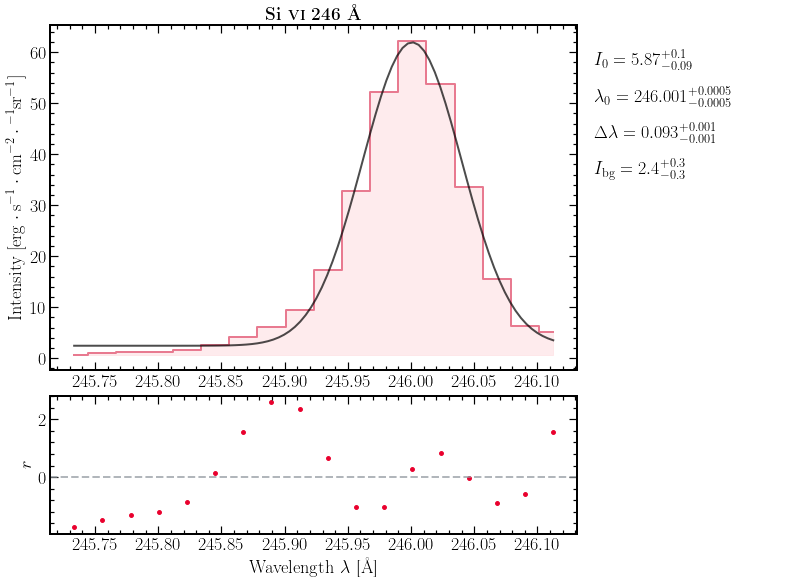

In [53]:
SiVI_246_slice = (2050,2068)
wvl_SiVI_246 = wvl[SiVI_246_slice[0]:SiVI_246_slice[1]]
int_SiVI_246 = np.average(syn_spec[6:9,SiVI_246_slice[0]:SiVI_246_slice[1]],axis=0)

SiVI_246_fit_model = SpectrumFitSingle(data=int_SiVI_246,wvl=wvl_SiVI_246,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[246],
                                      int_max_init=[100],fwhm_init=[0.08])
# SiVI_246_fit_model.plot(plot_fit=False,plot_params=False)
SiVI_246_fit_model.run_HahnMC(n_chain=10000)
# SiVI_246_fit_model.run_lse()
SiVI_246_fit_model.plot(plot_title=r"\textbf{Si \textsc{vi} 246 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SiVI_246_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.08276631 0.06824496 0.06038433 0.11990837]


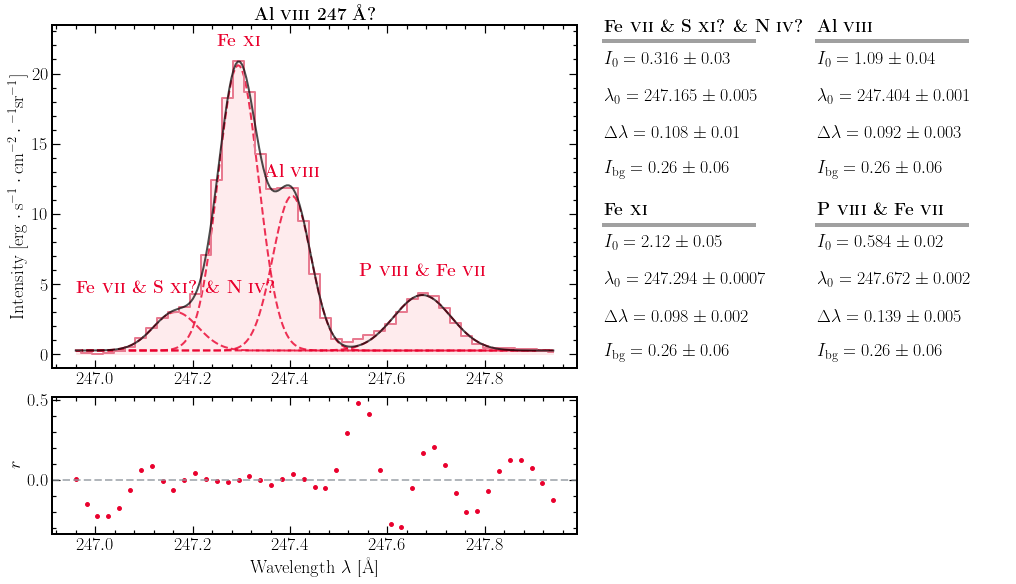

In [54]:
AlVIII_247_slice = (2105,2150)
wvl_AlVIII_247 = wvl[AlVIII_247_slice[0]:AlVIII_247_slice[1]]
int_AlVIII_247 = np.average(syn_spec[6:9,AlVIII_247_slice[0]:AlVIII_247_slice[1]],axis=0)

AlVIII_247_fit_model = SpectrumFitSingle(data=int_AlVIII_247,wvl=wvl_AlVIII_247,err=None,
                                      same_width=False,line_number=4,line_wvl_init=[247.1,247.29,247.4,247.7],
                                      int_max_init=[3,20,12,5],fwhm_init=[0.08,0.08,0.08,0.08])
# AlVIII_247_fit_model.plot(plot_fit=False,plot_params=False)
# AlVIII_247_fit_model.run_HahnMC(n_chain=10000)
AlVIII_247_fit_model.run_lse()
AlVIII_247_fit_model.plot(plot_title=r"\textbf{Al \textsc{viii} 247 \mbox{\AA}?}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{vii} \& S \textsc{xi}? \& N \textsc{iv}?}",
                                 r"\textbf{Fe \textsc{xi}}",r"\textbf{Al \textsc{viii}}",r"\textbf{P \textsc{viii} \& Fe \textsc{vii}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(AlVIII_247_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.07816185]


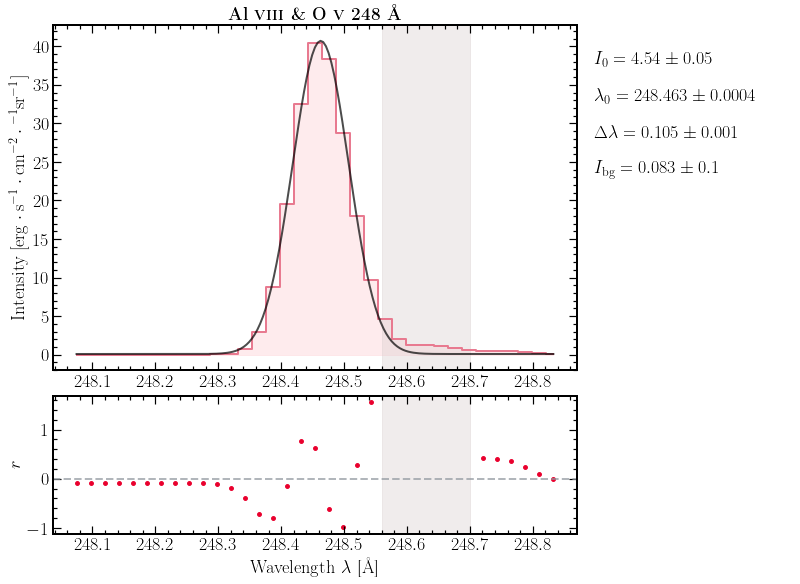

In [55]:
AlVIII_248_slice = (2155,2190)
wvl_AlVIII_248 = wvl[AlVIII_248_slice[0]:AlVIII_248_slice[1]]
int_AlVIII_248 = np.average(syn_spec[6:9,AlVIII_248_slice[0]:AlVIII_248_slice[1]],axis=0)

AlVIII_248_fit_model = SpectrumFitSingle(data=int_AlVIII_248,wvl=wvl_AlVIII_248,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[248.45],
                                      int_max_init=[50],fwhm_init=[0.08],mask=[[248.56,248.7]])
# AlVIII_248_fit_model.plot(plot_fit=False,plot_params=False)
# AlVIII_248_fit_model.run_HahnMC(n_chain=10000)
AlVIII_248_fit_model.run_lse()
AlVIII_248_fit_model.plot(plot_title=r"\textbf{Al \textsc{viii} \& O \textsc{v} 248 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",#line_caption=[r"\textbf{Al \textsc{viii}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(AlVIII_248_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06793549 0.06285365]


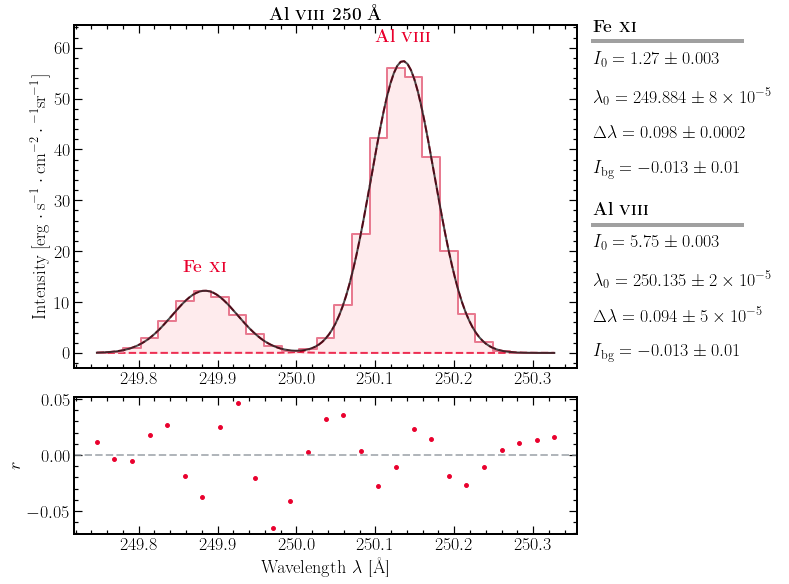

In [56]:
AlVIII_250_slice = (2230,2257)
wvl_AlVIII_250 = wvl[AlVIII_250_slice[0]:AlVIII_250_slice[1]]
int_AlVIII_250 = np.average(syn_spec[6:9,AlVIII_250_slice[0]:AlVIII_250_slice[1]],axis=0)

AlVIII_250_fit_model = SpectrumFitSingle(data=int_AlVIII_250,wvl=wvl_AlVIII_250,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[249.87,250.15],
                                      int_max_init=[10,60],fwhm_init=[0.08,0.08])
# AlVIII_250_fit_model.plot(plot_fit=False,plot_params=False)
# AlVIII_250_fit_model.run_HahnMC(n_chain=10000)
AlVIII_250_fit_model.run_lse()
AlVIII_250_fit_model.plot(plot_title=r"\textbf{Al \textsc{viii} 250 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}",r"\textbf{Al \textsc{viii}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(AlVIII_250_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.07542912 0.05754015]


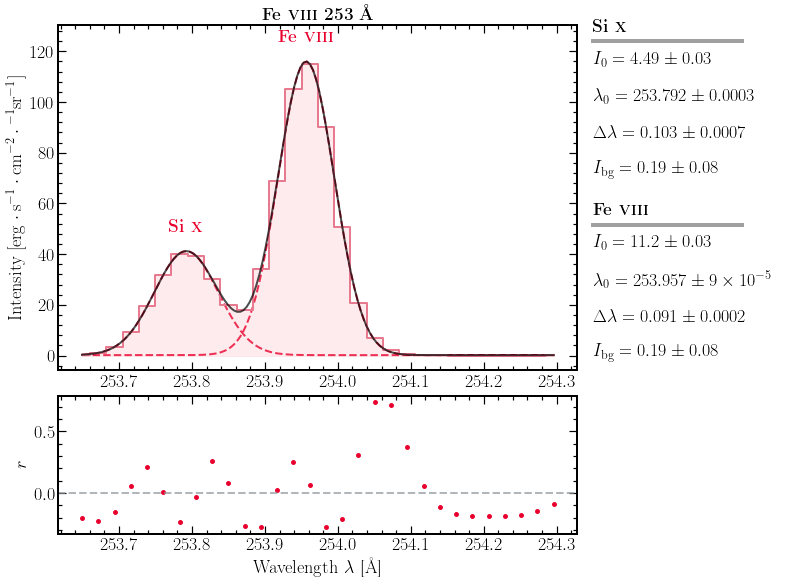

In [57]:
FeVIII_253_slice = (2405,2435)
wvl_FeVIII_253 = wvl[FeVIII_253_slice[0]:FeVIII_253_slice[1]]
int_FeVIII_253 = np.average(syn_spec[6:9,FeVIII_253_slice[0]:FeVIII_253_slice[1]],axis=0)

FeVIII_253_fit_model = SpectrumFitSingle(data=int_FeVIII_253,wvl=wvl_FeVIII_253,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[253.8,253.93],
                                      int_max_init=[30],fwhm_init=[0.08,0.08])
# FeVIII_253_fit_model.plot(plot_fit=False,plot_params=False)
# FeVIII_253_fit_model.run_HahnMC(n_chain=10000)
FeVIII_253_fit_model.run_lse()
FeVIII_253_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 253 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Si \textsc{x}}",r"\textbf{Fe \textsc{viii}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_253_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06939487]


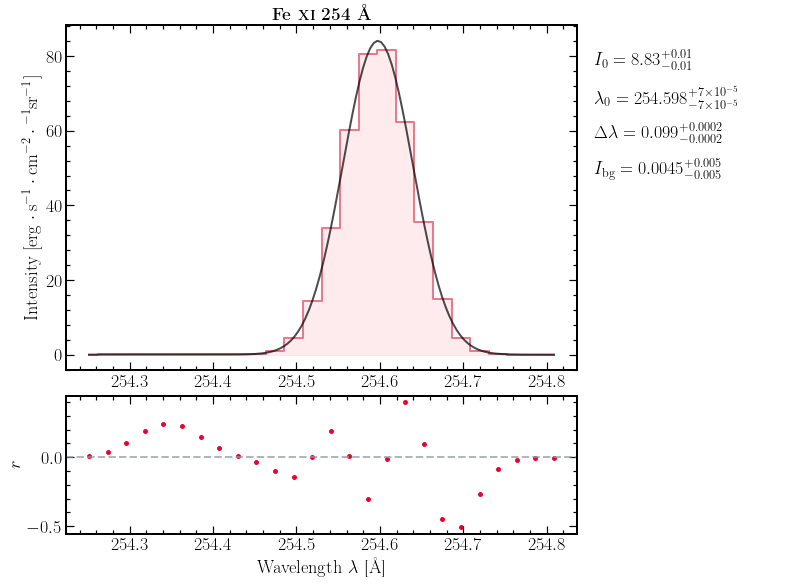

In [58]:
FeXI_254_slice = (2432,2458)
wvl_FeXI_254 = wvl[FeXI_254_slice[0]:FeXI_254_slice[1]]
int_FeXI_254 = np.average(syn_spec[6:9,FeXI_254_slice[0]:FeXI_254_slice[1]],axis=0)

FeXI_254_fit_model = SpectrumFitSingle(data=int_FeXI_254,wvl=wvl_FeXI_254,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[254.58],
                                      int_max_init=[70],fwhm_init=[0.08])
# FeXI_254_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_254_fit_model.run_HahnMC(n_chain=10000)
# FeXI_254_fit_model.run_lse()
FeXI_254_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 254 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_254_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05777491]


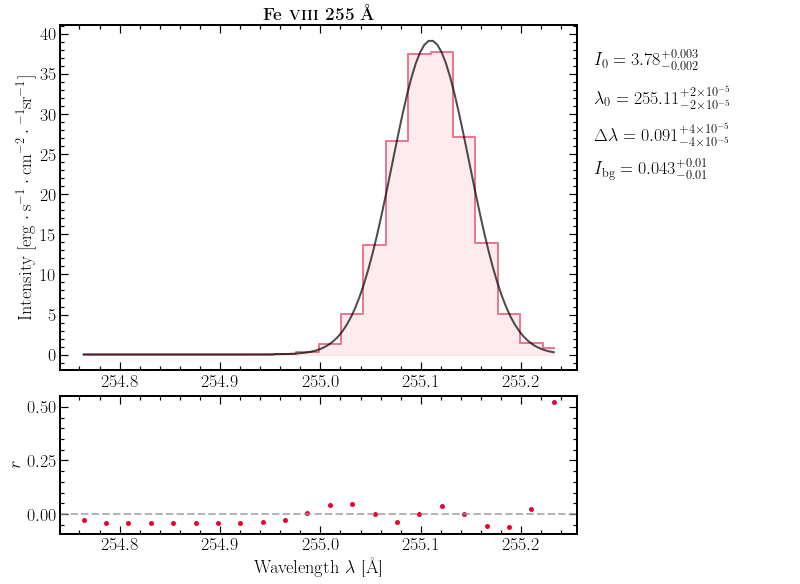

In [59]:
FeVIII_255_slice = (2455,2477)
wvl_FeVIII_255 = wvl[FeVIII_255_slice[0]:FeVIII_255_slice[1]]
int_FeVIII_255 = np.average(syn_spec[6:9,FeVIII_255_slice[0]:FeVIII_255_slice[1]],axis=0)

FeVIII_255_fit_model = SpectrumFitSingle(data=int_FeVIII_255,wvl=wvl_FeVIII_255,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[255.1],
                                      int_max_init=[50],fwhm_init=[0.08])
# FeVIII_255_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_255_fit_model.run_HahnMC(n_chain=10000)
# FeVIII_255_fit_model.run_lse()
FeVIII_255_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 255 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_255_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05874161 0.05673735]


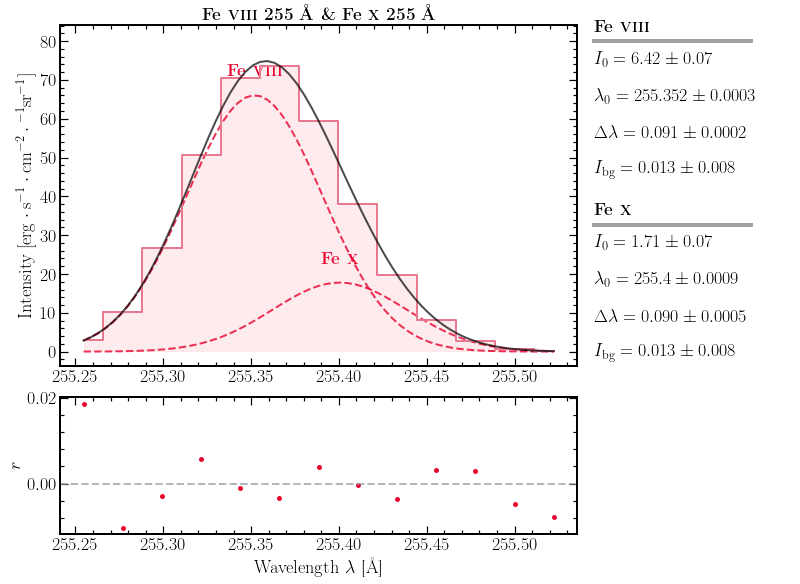

In [60]:
FeVIII_FeX_255_slice = (2477,2490)
wvl_FeVIII_FeX_255 = wvl[FeVIII_FeX_255_slice[0]:FeVIII_FeX_255_slice[1]]
int_FeVIII_FeX_255 = np.average(syn_spec[6:9,FeVIII_FeX_255_slice[0]:FeVIII_FeX_255_slice[1]],axis=0)

FeVIII_FeX_255_fit_model = SpectrumFitSingle(data=int_FeVIII_FeX_255,wvl=wvl_FeVIII_FeX_255,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[255.35,255.39],
                                      int_max_init=[100,40],fwhm_init=[0.08,0.08])
# FeVIII_FeX_255_fit_model.plot(plot_fit=False,plot_params=False)
# FeVIII_FeX_255_fit_model.run_HahnMC(n_chain=10000)
FeVIII_FeX_255_fit_model.run_lse()
FeVIII_FeX_255_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 255 \mbox{\AA} \& Fe \textsc{x} 255 \mbox{\AA} }",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{viii}}",r"\textbf{Fe \textsc{x}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_FeX_255_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.05744387]


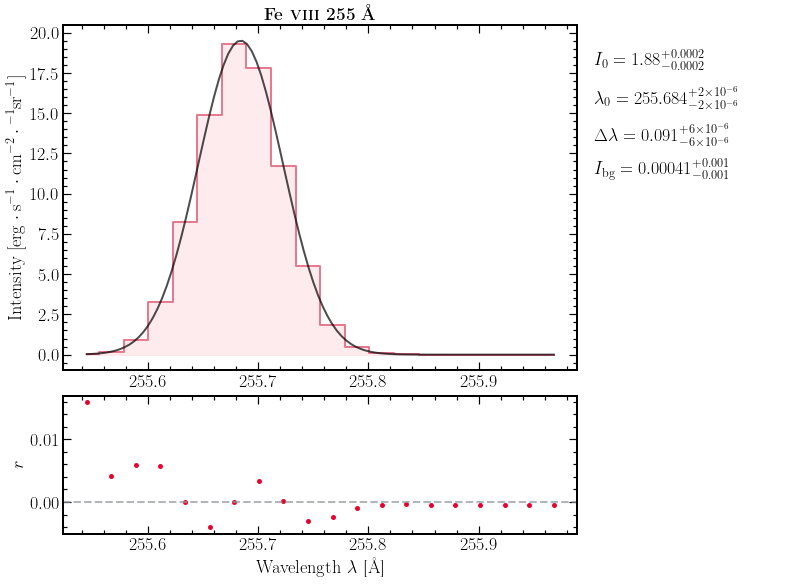

In [61]:
FeVIII_255_slice = (2490,2510)
wvl_FeVIII_255 = wvl[FeVIII_255_slice[0]:FeVIII_255_slice[1]]
int_FeVIII_255 = np.average(syn_spec[6:9,FeVIII_255_slice[0]:FeVIII_255_slice[1]],axis=0)

FeVIII_255_fit_model = SpectrumFitSingle(data=int_FeVIII_255,wvl=wvl_FeVIII_255,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[255.68],
                                      int_max_init=[30],fwhm_init=[0.08])
# FeVIII_255_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_255_fit_model.run_HahnMC(n_chain=10000)
# FeVIII_255_fit_model.run_lse()
FeVIII_255_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 255 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_255_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.09707433 0.07365516]


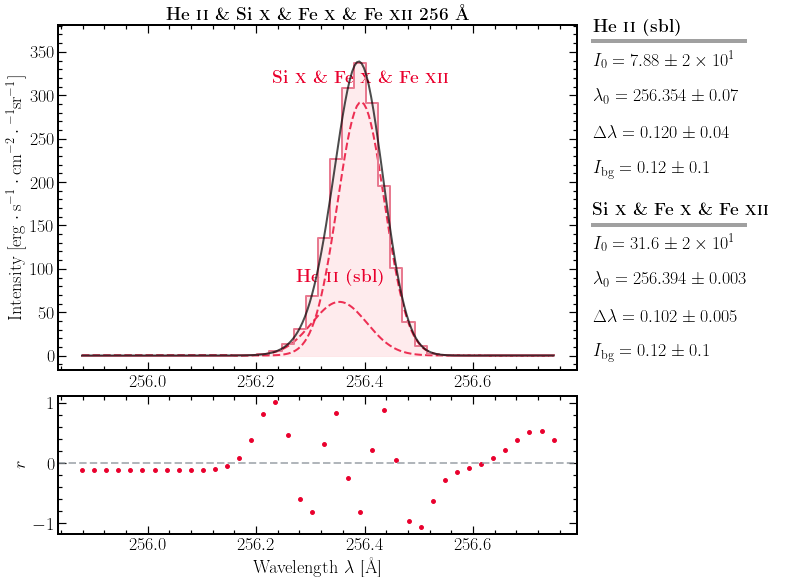

In [62]:
HeII_256_slice = (2505,2545)
wvl_HeII_256 = wvl[HeII_256_slice[0]:HeII_256_slice[1]]
int_HeII_256 = np.average(syn_spec[6:9,HeII_256_slice[0]:HeII_256_slice[1]],axis=0)

HeII_256_fit_model = SpectrumFitSingle(data=int_HeII_256,wvl=wvl_HeII_256,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[256.3,256.41],
                                      int_max_init=[10,350],fwhm_init=[0.1,0.08])
# HeII_256_fit_model.plot(plot_fit=False,plot_params=False)
# HeII_256_fit_model.run_HahnMC(n_chain=10000)
HeII_256_fit_model.run_lse()
HeII_256_fit_model.plot(plot_title=r"\textbf{He \textsc{ii} \& Si \textsc{x} \& Fe \textsc{x} \& Fe \textsc{xii} 256 \mbox{\AA} }",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{He \textsc{ii} (sbl)}",
                        r"\textbf{Si \textsc{x} \& Fe \textsc{x} \& Fe \textsc{xii}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(HeII_256_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06996189]


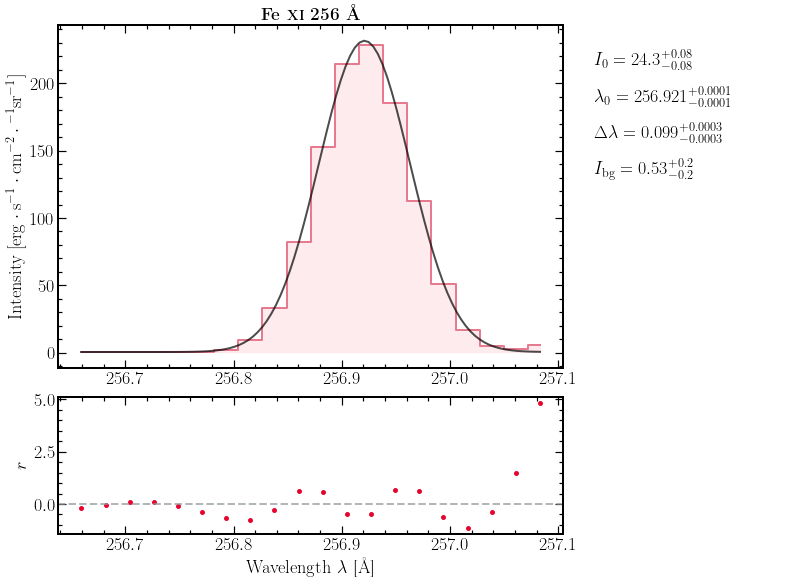

In [63]:
FeXI_256_slice = (2540,2560)
wvl_FeXI_256 = wvl[FeXI_256_slice[0]:FeXI_256_slice[1]]
int_FeXI_256 = np.average(syn_spec[6:9,FeXI_256_slice[0]:FeXI_256_slice[1]],axis=0)

FeXI_256_fit_model = SpectrumFitSingle(data=int_FeXI_256,wvl=wvl_FeXI_256,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[256.91],
                                      int_max_init=[200],fwhm_init=[0.08])
# FeXI_256_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_256_fit_model.run_HahnMC(n_chain=10000)
# FeXI_256_fit_model.run_lse()
FeXI_256_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 256 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_256_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06330009]


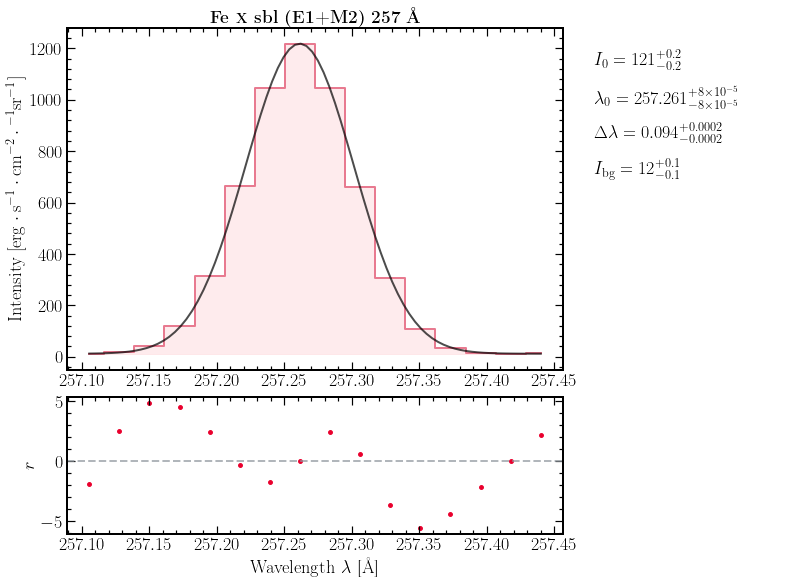

In [64]:
FeX_257_slice = (2560,2576)
wvl_FeX_257 = wvl[FeX_257_slice[0]:FeX_257_slice[1]]
int_FeX_257 = np.average(syn_spec[6:9,FeX_257_slice[0]:FeX_257_slice[1]],axis=0)

FeX_257_fit_model = SpectrumFitSingle(data=int_FeX_257,wvl=wvl_FeX_257,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[257.26],
                                      int_max_init=[1200],fwhm_init=[0.08])
# FeX_257_fit_model.plot(plot_fit=False,plot_params=False)
FeX_257_fit_model.run_HahnMC(n_chain=10000)
# FeX_257_fit_model.run_lse()
FeX_257_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} sbl (E1+M2) 257 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_257_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06407304 0.057068  ]


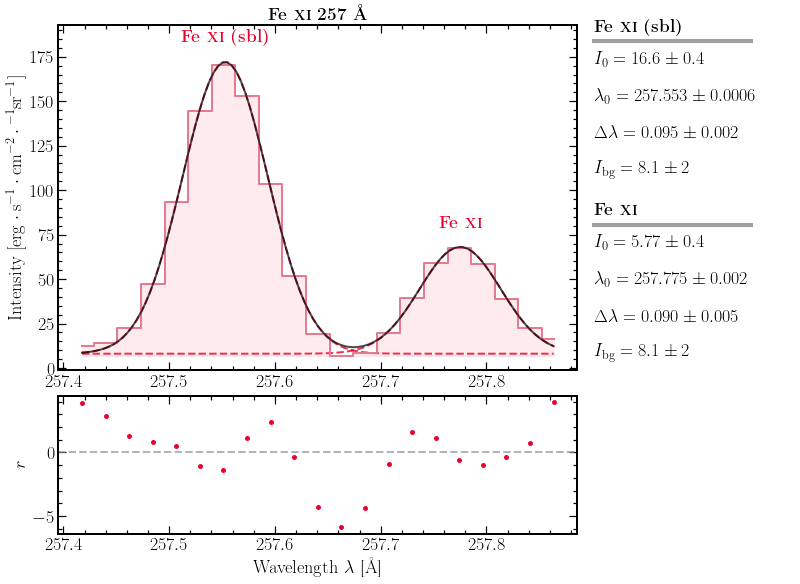

In [65]:
FeXI_257_slice = (2574,2595)
wvl_FeXI_257 = wvl[FeXI_257_slice[0]:FeXI_257_slice[1]]
int_FeXI_257 = np.average(syn_spec[6:9,FeXI_257_slice[0]:FeXI_257_slice[1]],axis=0)

FeXI_257_fit_model = SpectrumFitSingle(data=int_FeXI_257,wvl=wvl_FeXI_257,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[257.55,257.76],
                                      int_max_init=[160,60],fwhm_init=[0.08,0.08])
# FeXI_257_fit_model.plot(plot_fit=False,plot_params=False)
# FeXI_257_fit_model.run_HahnMC(n_chain=10000)
FeXI_257_fit_model.run_lse()
FeXI_257_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 257 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi} (sbl)}",r"\textbf{Fe \textsc{xi}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_257_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.09442689 0.06446026]


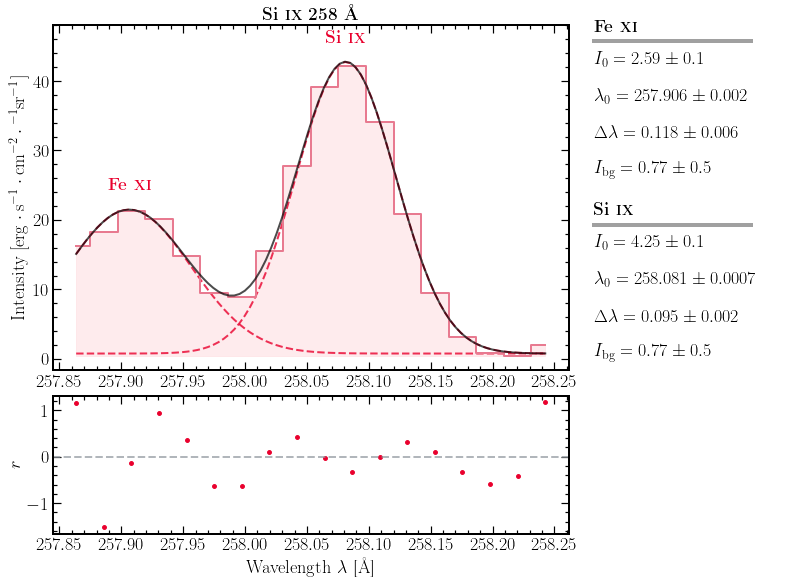

In [66]:
SiIX_258_slice = (2594,2612)
wvl_SiIX_258 = wvl[SiIX_258_slice[0]:SiIX_258_slice[1]]
int_SiIX_258 = np.average(syn_spec[6:9,SiIX_258_slice[0]:SiIX_258_slice[1]],axis=0)

SiIX_258_fit_model = SpectrumFitSingle(data=int_SiIX_258,wvl=wvl_SiIX_258,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[257.91,258.07],
                                      int_max_init=[20,40],fwhm_init=[0.08,0.08])
# SiIX_258_fit_model.plot(plot_fit=False,plot_params=False)
# SiIX_258_fit_model.run_HahnMC(n_chain=10000)
SiIX_258_fit_model.run_lse()
SiIX_258_fit_model.plot(plot_title=r"\textbf{Si \textsc{ix} 258 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Si \textsc{ix}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SiIX_258_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.07772105]


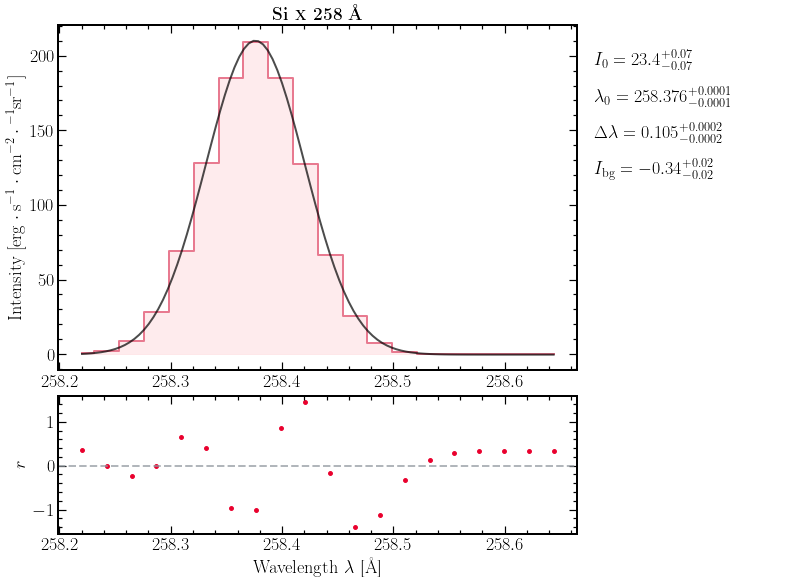

In [67]:
SiX_258_slice = (2610,2630)
wvl_SiX_258 = wvl[SiX_258_slice[0]:SiX_258_slice[1]]
int_SiX_258 = np.average(syn_spec[6:9,SiX_258_slice[0]:SiX_258_slice[1]],axis=0)

SiX_258_fit_model = SpectrumFitSingle(data=int_SiX_258,wvl=wvl_SiX_258,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[258.36],
                                      int_max_init=[200],fwhm_init=[0.08])
# SiX_258_fit_model.plot(plot_fit=False,plot_params=False)
SiX_258_fit_model.run_HahnMC(n_chain=10000)
# SiX_258_fit_model.run_lse()
SiX_258_fit_model.plot(plot_title=r"\textbf{Si \textsc{x} 258 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SiX_258_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.07874204 0.08419359]


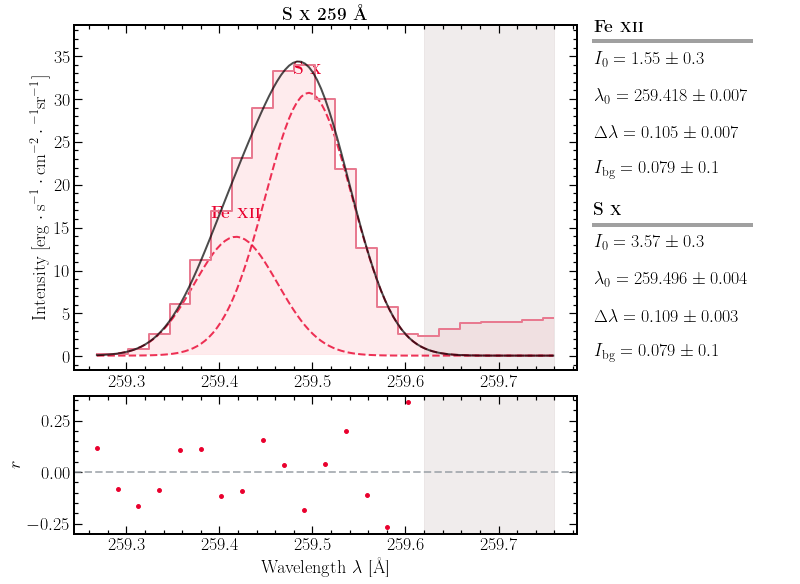

In [68]:
SX_259_slice = (2657,2680)
wvl_SX_259 = wvl[SX_259_slice[0]:SX_259_slice[1]]
int_SX_259 = np.average(syn_spec[6:9,SX_259_slice[0]:SX_259_slice[1]],axis=0)

SX_259_fit_model = SpectrumFitSingle(data=int_SX_259,wvl=wvl_SX_259,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[259.4,259.5],
                                      int_max_init=[10,30],fwhm_init=[0.08,0.08],mask=[[259.62,259.76]])
# SX_259_fit_model.plot(plot_fit=False,plot_params=False)
# SX_259_fit_model.run_HahnMC(n_chain=10000)
SX_259_fit_model.run_lse()
SX_259_fit_model.plot(plot_title=r"\textbf{S \textsc{x} 259 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xii}}",r"\textbf{S \textsc{x}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SX_259_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.0861209  0.06449468 0.08131208]


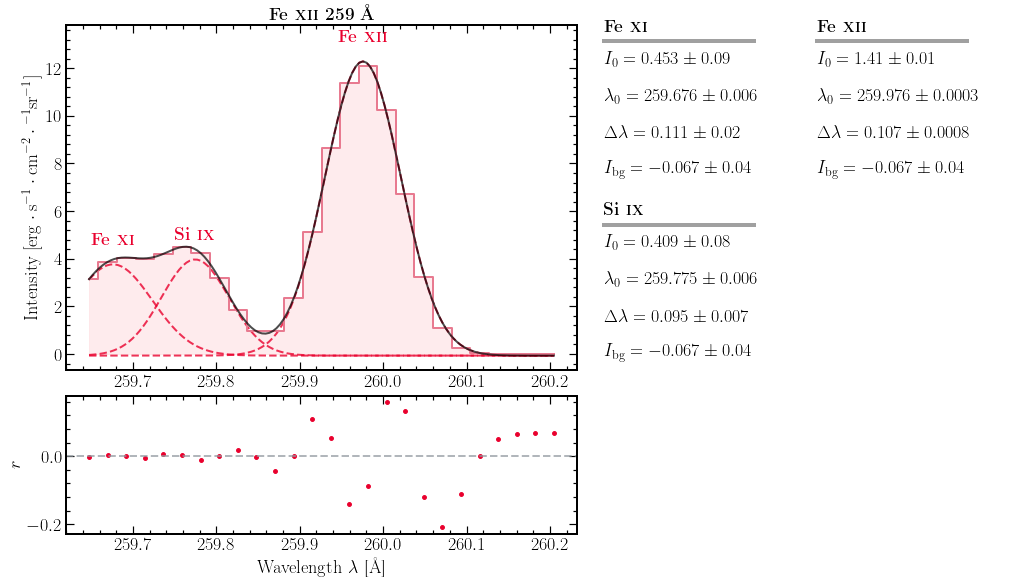

In [69]:
FeXII_259_slice = (2674,2700)
wvl_FeXII_259 = wvl[FeXII_259_slice[0]:FeXII_259_slice[1]]
int_FeXII_259 = np.average(syn_spec[6:9,FeXII_259_slice[0]:FeXII_259_slice[1]],axis=0)

FeXII_259_fit_model = SpectrumFitSingle(data=int_FeXII_259,wvl=wvl_FeXII_259,err=None,
                                      same_width=False,line_number=3,line_wvl_init=[259.67,259.77,259.97],
                                      int_max_init=[4,4,10],fwhm_init=[0.08,0.08,0.08])
# FeXII_259_fit_model.plot(plot_fit=False,plot_params=False)
# FeXII_259_fit_model.run_HahnMC(n_chain=10000)
FeXII_259_fit_model.run_lse()
FeXII_259_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 259 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Si \textsc{ix}}",
                                                                                        r"\textbf{Fe \textsc{xii}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_259_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.07902727]


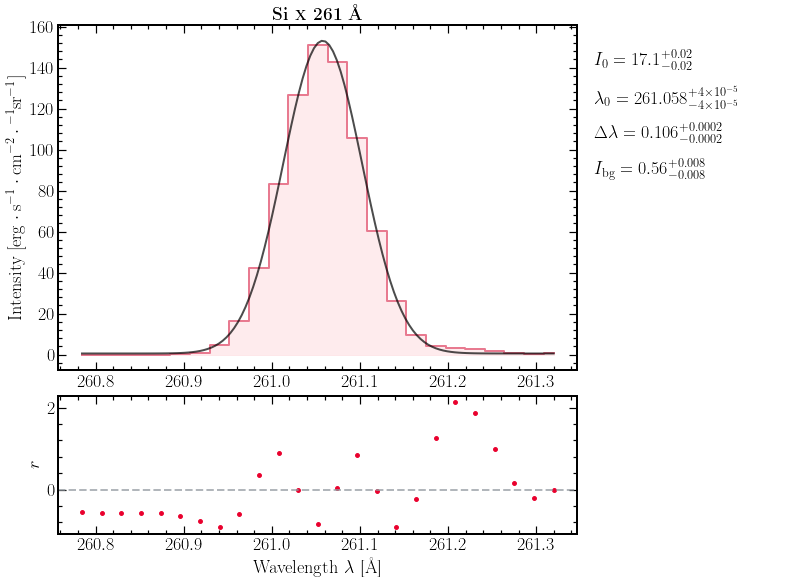

In [70]:
SiX_261_slice = (2725,2750)
wvl_SiX_261 = wvl[SiX_261_slice[0]:SiX_261_slice[1]]
int_SiX_261 = np.average(syn_spec[6:9,SiX_261_slice[0]:SiX_261_slice[1]],axis=0)

SiX_261_fit_model = SpectrumFitSingle(data=int_SiX_261,wvl=wvl_SiX_261,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[261.05],
                                      int_max_init=[140],fwhm_init=[0.08])
# SiX_261_fit_model.plot(plot_fit=False,plot_params=False)
SiX_261_fit_model.run_HahnMC(n_chain=10000)
# SiX_261_fit_model.run_lse()
SiX_261_fit_model.plot(plot_title=r"\textbf{Si \textsc{x} 261 \mbox{\AA}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SiX_261_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.08044722]


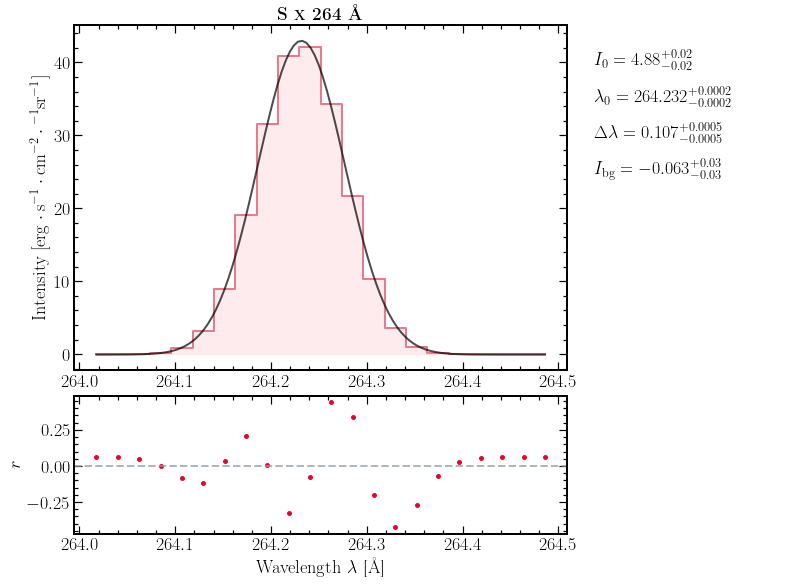

In [71]:
SX_264_slice = (2870,2892)
wvl_SX_264 = wvl[SX_264_slice[0]:SX_264_slice[1]]
int_SX_264 = np.average(syn_spec[6:9,SX_264_slice[0]:SX_264_slice[1]],axis=0)

SX_264_fit_model = SpectrumFitSingle(data=int_SX_264,wvl=wvl_SX_264,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[264.23],
                                      int_max_init=[40],fwhm_init=[0.08])
# SX_264_fit_model.plot(plot_fit=False,plot_params=False)
SX_264_fit_model.run_HahnMC(n_chain=10000)
# SX_264_fit_model.run_lse()
SX_264_fit_model.plot(plot_title=r"\textbf{S \textsc{x} 264 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SX_264_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.08486776]


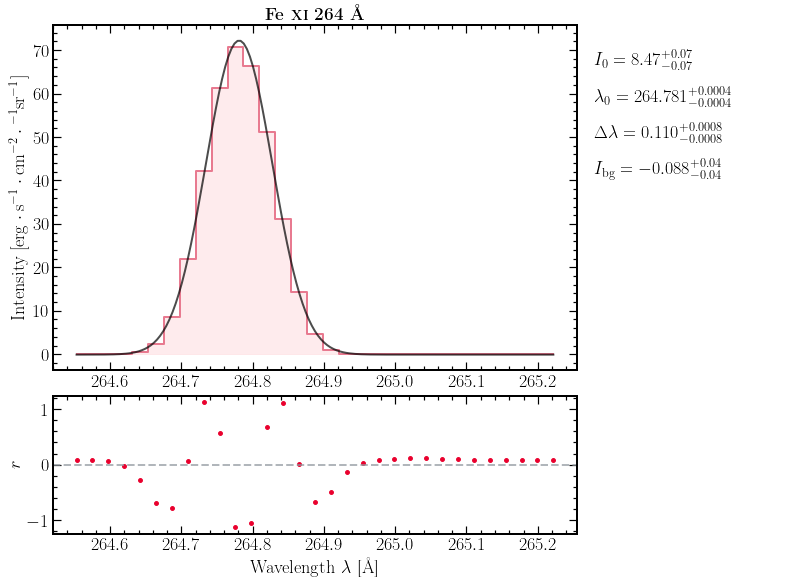

In [72]:
FeXI_264_slice = (2894,2925)
wvl_FeXI_264 = wvl[FeXI_264_slice[0]:FeXI_264_slice[1]]
int_FeXI_264 = np.average(syn_spec[6:9,FeXI_264_slice[0]:FeXI_264_slice[1]],axis=0)

FeXI_264_fit_model = SpectrumFitSingle(data=int_FeXI_264,wvl=wvl_FeXI_264,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[264.78],
                                      int_max_init=[1100],fwhm_init=[0.08])
# FeXI_264_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_264_fit_model.run_HahnMC(n_chain=10000)
# FeXI_264_fit_model.run_lse()
FeXI_264_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 264 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_264_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06529681 0.07878392]


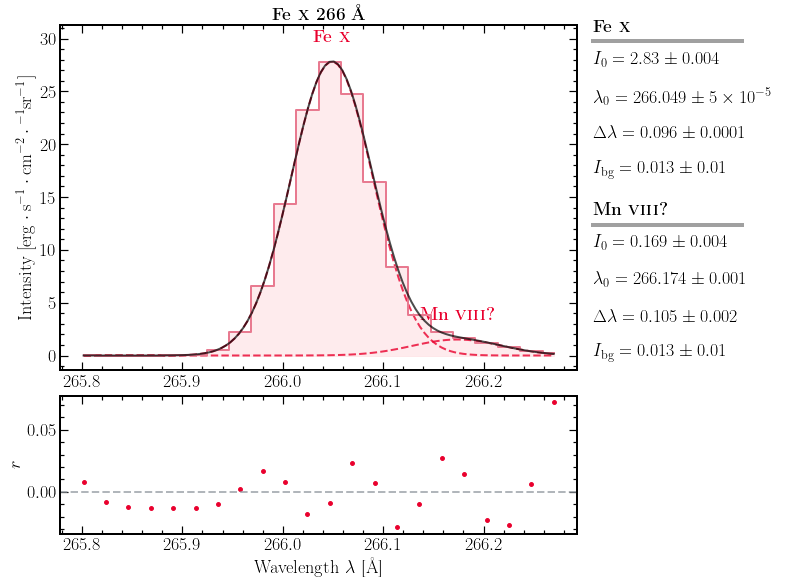

In [73]:
FeX_266_slice = (2950,2972)
wvl_FeX_266 = wvl[FeX_266_slice[0]:FeX_266_slice[1]]
int_FeX_266 = np.average(syn_spec[6:9,FeX_266_slice[0]:FeX_266_slice[1]],axis=0)

FeX_266_fit_model = SpectrumFitSingle(data=int_FeX_266,wvl=wvl_FeX_266,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[266.05,266.15],
                                      int_max_init=[30,3],fwhm_init=[0.08,0.08])
# FeX_266_fit_model.plot(plot_fit=False,plot_params=False)
# FeX_266_fit_model.run_HahnMC(n_chain=10000)
FeX_266_fit_model.run_lse()
FeX_266_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 266 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{x}}",r"\textbf{Mn \textsc{viii}?}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_266_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.08094113 0.08638214 0.07160597]


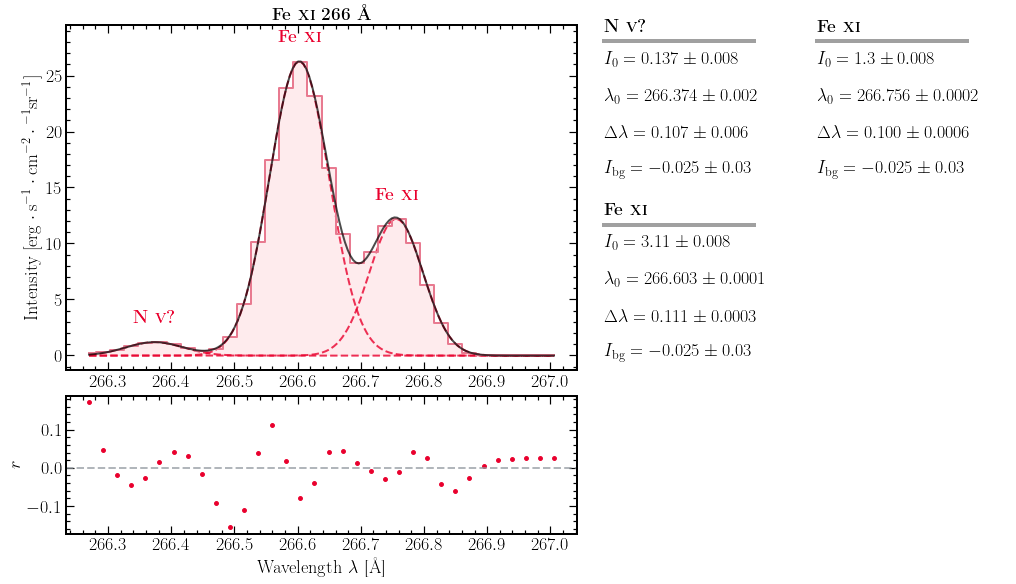

In [74]:
FeXI_266_slice = (2971,3005)
wvl_FeXI_266 = wvl[FeXI_266_slice[0]:FeXI_266_slice[1]]
int_FeXI_266 = np.average(syn_spec[6:9,FeXI_266_slice[0]:FeXI_266_slice[1]],axis=0)

FeXI_266_fit_model = SpectrumFitSingle(data=int_FeXI_266,wvl=wvl_FeXI_266,err=None,
                                      same_width=False,line_number=3,line_wvl_init=[266.37,266.6,266.73],
                                      int_max_init=[2,25,10],fwhm_init=[0.08,0.08,0.08])
# FeXI_266_fit_model.plot(plot_fit=False,plot_params=False)
# FeXI_266_fit_model.run_HahnMC(n_chain=10000)
FeXI_266_fit_model.run_lse()
FeXI_266_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 266 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{N \textsc{v}?}",r"\textbf{Fe \textsc{xi}}",
                                                                                        r"\textbf{Fe \textsc{xi}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_266_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06374852]


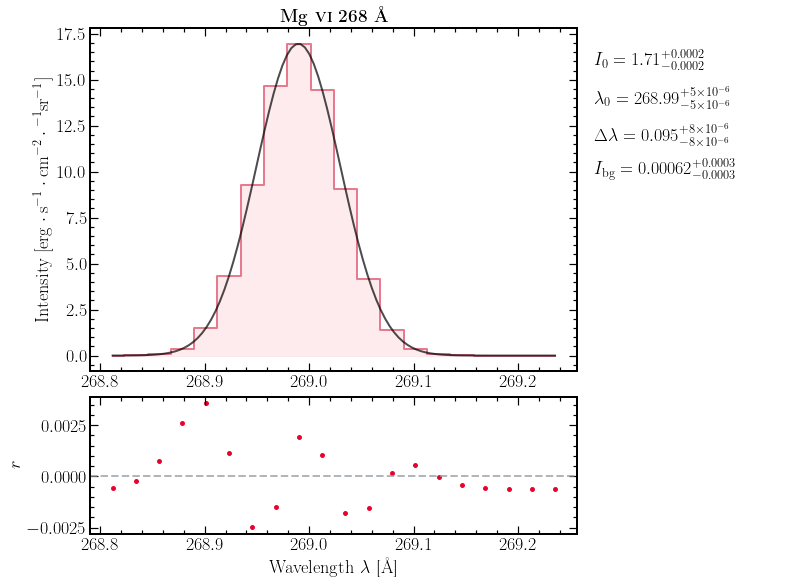

In [75]:
MgVI_268_slice = (3085,3105)
wvl_MgVI_268 = wvl[MgVI_268_slice[0]:MgVI_268_slice[1]]
int_MgVI_268 = np.average(syn_spec[6:9,MgVI_268_slice[0]:MgVI_268_slice[1]],axis=0)

MgVI_268_fit_model = SpectrumFitSingle(data=int_MgVI_268,wvl=wvl_MgVI_268,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[268.96],
                                      int_max_init=[30],fwhm_init=[0.08])
# MgVI_268_fit_model.plot(plot_fit=False,plot_params=False)
MgVI_268_fit_model.run_HahnMC(n_chain=10000)
# MgVI_268_fit_model.run_lse()
MgVI_268_fit_model.plot(plot_title=r"\textbf{Mg \textsc{vi} 268 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(MgVI_268_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.07028839 0.0806863 ]


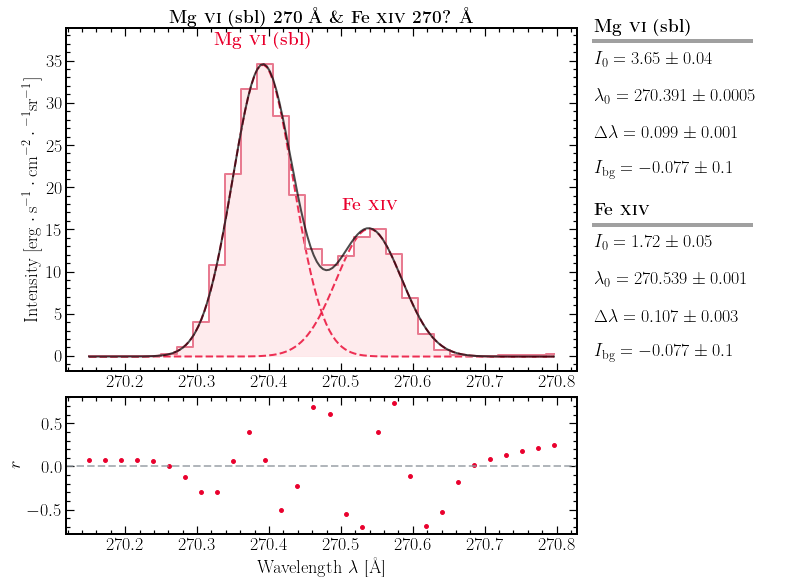

In [76]:
MgVI_FeXIV_270_slice = (3145,3175)
wvl_MgVI_FeXIV_270 = wvl[MgVI_FeXIV_270_slice[0]:MgVI_FeXIV_270_slice[1]]
int_MgVI_FeXIV_270 = np.average(syn_spec[6:9,MgVI_FeXIV_270_slice[0]:MgVI_FeXIV_270_slice[1]],axis=0)

MgVI_FeXIV_270_fit_model = SpectrumFitSingle(data=int_MgVI_FeXIV_270,wvl=wvl_MgVI_FeXIV_270,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[270.4,270.55],
                                      int_max_init=[60,20],fwhm_init=[0.08,0.08])
# MgVI_FeXIV_270_fit_model.plot(plot_fit=False,plot_params=False)
# MgVI_FeXIV_270_fit_model.run_HahnMC(n_chain=10000)
MgVI_FeXIV_270_fit_model.run_lse()
MgVI_FeXIV_270_fit_model.plot(plot_title=r"\textbf{Mg \textsc{vi} (sbl) 270 \mbox{\AA} \& Fe \textsc{xiv} 270? \mbox{\AA} }",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Mg \textsc{vi} (sbl)}",r"\textbf{Fe \textsc{xiv}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(MgVI_FeXIV_270_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.08251294]


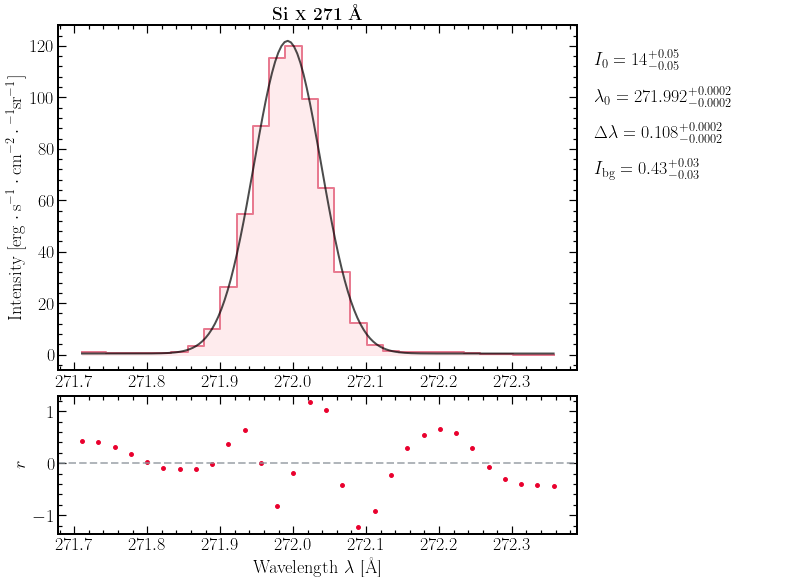

In [77]:
SiX_271_slice = (3215,3245)
wvl_SiX_271 = wvl[SiX_271_slice[0]:SiX_271_slice[1]]
int_SiX_271 = np.average(syn_spec[6:9,SiX_271_slice[0]:SiX_271_slice[1]],axis=0)

SiX_271_fit_model = SpectrumFitSingle(data=int_SiX_271,wvl=wvl_SiX_271,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[271.97],
                                      int_max_init=[100],fwhm_init=[0.08])
# SiX_271_fit_model.plot(plot_fit=False,plot_params=False)
SiX_271_fit_model.run_HahnMC(n_chain=10000)
# SiX_271_fit_model.run_lse()
SiX_271_fit_model.plot(plot_title=r"\textbf{Si \textsc{x} 271 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SiX_271_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06558431]


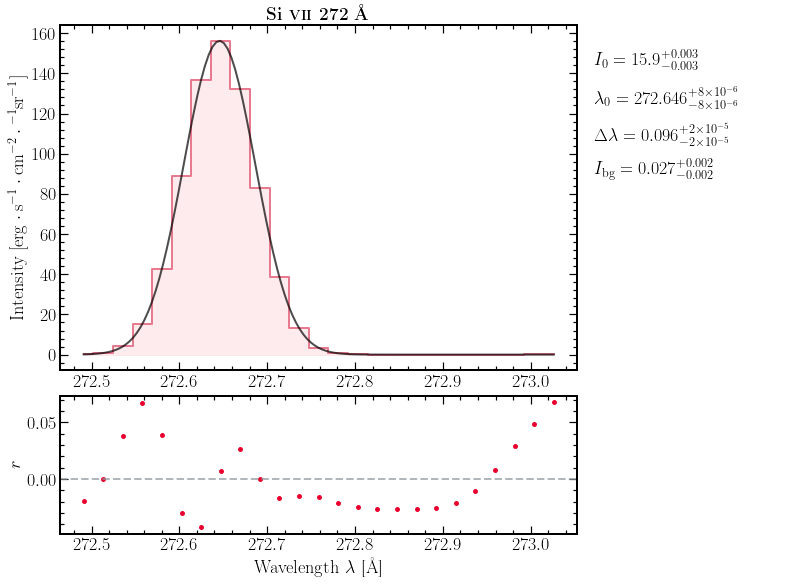

In [78]:
SiVII_272_slice = (3250,3275)
wvl_SiVII_272 = wvl[SiVII_272_slice[0]:SiVII_272_slice[1]]
int_SiVII_272 = np.average(syn_spec[6:9,SiVII_272_slice[0]:SiVII_272_slice[1]],axis=0)

SiVII_272_fit_model = SpectrumFitSingle(data=int_SiVII_272,wvl=wvl_SiVII_272,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[272.65],
                                      int_max_init=[140],fwhm_init=[0.08])
# SiVII_272_fit_model.plot(plot_fit=False,plot_params=False)
SiVII_272_fit_model.run_HahnMC(n_chain=10000)
# SiVII_272_fit_model.run_lse()
SiVII_272_fit_model.plot(plot_title=r"\textbf{Si \textsc{vii} 272 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SiVII_272_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.09296812]


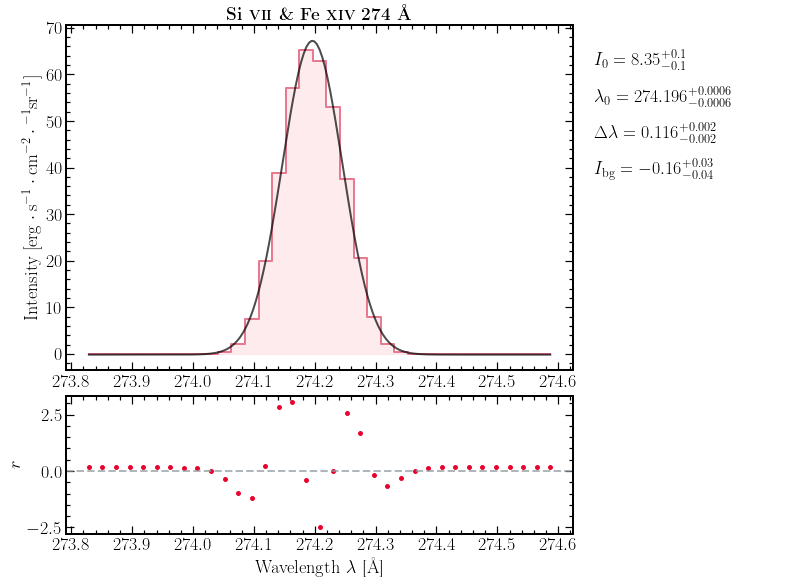

In [90]:
SiVII_274_slice = (3310,3345)
wvl_SiVII_274 = wvl[SiVII_274_slice[0]:SiVII_274_slice[1]]
int_SiVII_274 = np.average(syn_spec[6:9,SiVII_274_slice[0]:SiVII_274_slice[1]],axis=0)

SiVII_274_fit_model = SpectrumFitSingle(data=int_SiVII_274,wvl=wvl_SiVII_274,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[274.17],
                                      int_max_init=[80],fwhm_init=[0.08])
# SiVII_274_fit_model.plot(plot_fit=False,plot_params=False)
SiVII_274_fit_model.run_HahnMC(n_chain=10000)
# SiVII_274_fit_model.run_lse()
SiVII_274_fit_model.plot(plot_title=r"\textbf{Si \textsc{vii} \& Fe \textsc{xiv} 274 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SiVII_274_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06630096]


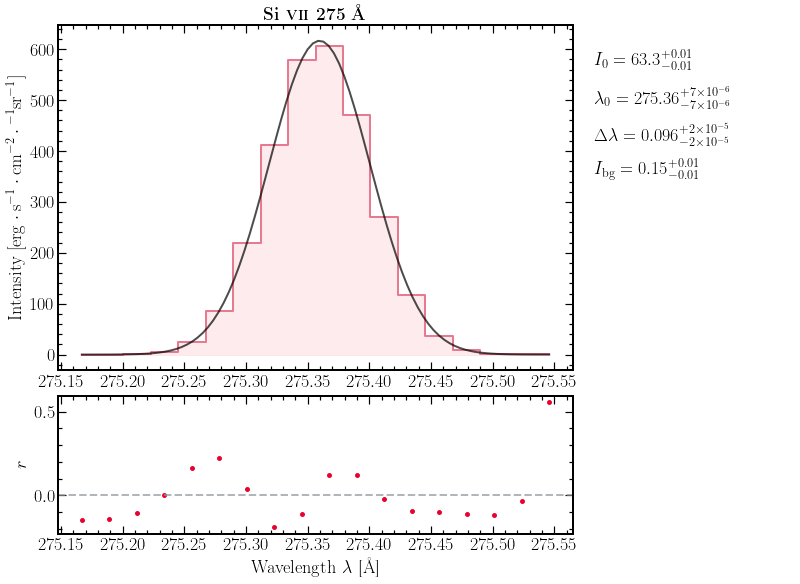

In [80]:
SiVII_275_slice = (3370,3388)
wvl_SiVII_275 = wvl[SiVII_275_slice[0]:SiVII_275_slice[1]]
int_SiVII_275 = np.average(syn_spec[6:9,SiVII_275_slice[0]:SiVII_275_slice[1]],axis=0)

SiVII_275_fit_model = SpectrumFitSingle(data=int_SiVII_275,wvl=wvl_SiVII_275,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[275.35],
                                      int_max_init=[800],fwhm_init=[0.08])
# SiVII_275_fit_model.plot(plot_fit=False,plot_params=False)
SiVII_275_fit_model.run_HahnMC(n_chain=10000)
# SiVII_275_fit_model.run_lse()
SiVII_275_fit_model.plot(plot_title=r"\textbf{Si \textsc{vii} 275 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SiVII_275_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06630072]


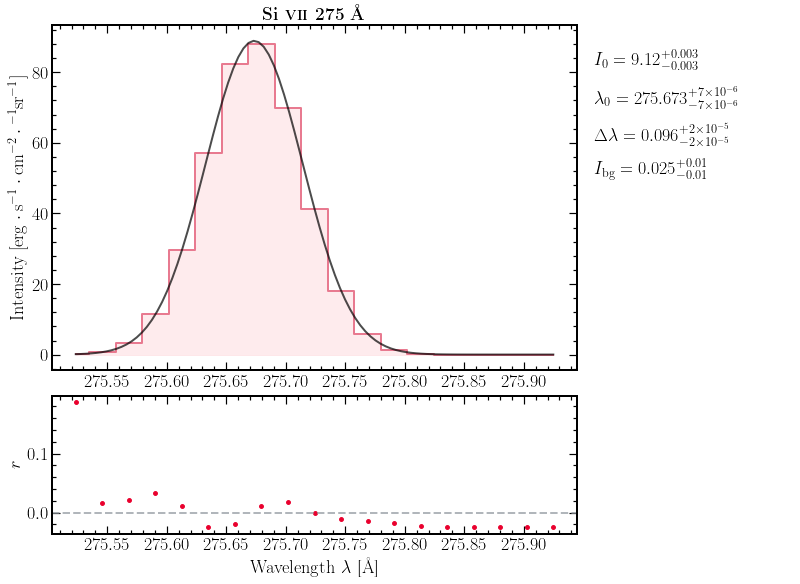

In [81]:
SiVII_275_2_slice = (3386,3405)
wvl_SiVII_275_2 = wvl[SiVII_275_2_slice[0]:SiVII_275_2_slice[1]]
int_SiVII_275_2 = np.average(syn_spec[6:9,SiVII_275_2_slice[0]:SiVII_275_2_slice[1]],axis=0)

SiVII_275_2_fit_model = SpectrumFitSingle(data=int_SiVII_275_2,wvl=wvl_SiVII_275_2,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[275.67],
                                      int_max_init=[120],fwhm_init=[0.08])
# SiVII_275_2_fit_model.plot(plot_fit=False,plot_params=False)
SiVII_275_2_fit_model.run_HahnMC(n_chain=10000)
# SiVII_275_2_fit_model.run_lse()
SiVII_275_2_fit_model.plot(plot_title=r"\textbf{Si \textsc{vii} 275 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SiVII_275_2_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06628534]


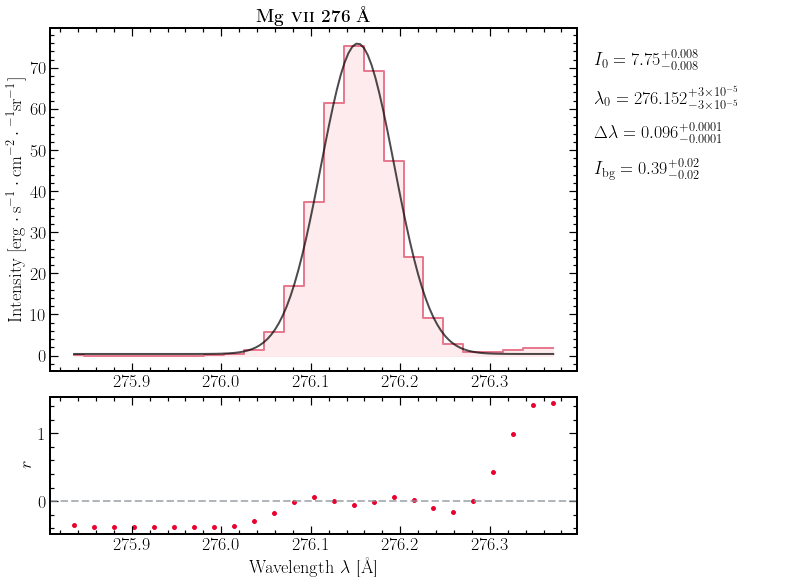

In [82]:
MgVII_276_slice = (3400,3425)
wvl_MgVII_276 = wvl[MgVII_276_slice[0]:MgVII_276_slice[1]]
int_MgVII_276 = np.average(syn_spec[6:9,MgVII_276_slice[0]:MgVII_276_slice[1]],axis=0)

MgVII_276_fit_model = SpectrumFitSingle(data=int_MgVII_276,wvl=wvl_MgVII_276,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[276.15],
                                      int_max_init=[100],fwhm_init=[0.08])
# MgVII_276_fit_model.plot(plot_fit=False,plot_params=False)
MgVII_276_fit_model.run_HahnMC(n_chain=10000)
# MgVII_276_fit_model.run_lse()
MgVII_276_fit_model.plot(plot_title=r"\textbf{Mg \textsc{vii} 276 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(MgVII_276_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06748378 0.06879553 0.0663625  0.08399072]


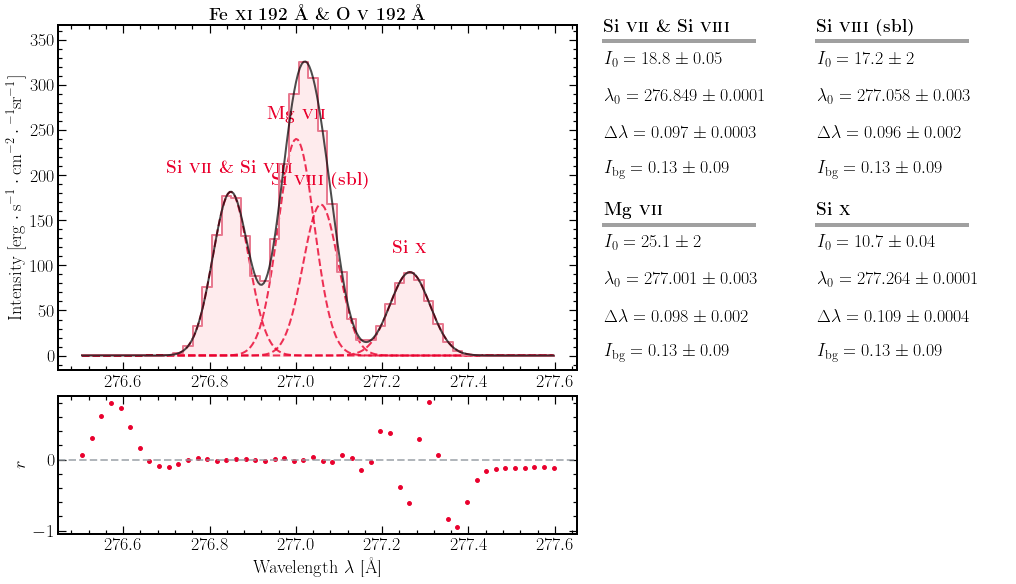

In [83]:
SiVII_SiVIII_MgVII_276_slice = (3430,3480)
wvl_SiVII_SiVIII_MgVII_276 = wvl[SiVII_SiVIII_MgVII_276_slice[0]:SiVII_SiVIII_MgVII_276_slice[1]]
int_SiVII_SiVIII_MgVII_276 = np.average(syn_spec[6:9,SiVII_SiVIII_MgVII_276_slice[0]:SiVII_SiVIII_MgVII_276_slice[1]],axis=0)

SiVII_SiVIII_MgVII_276_fit_model = SpectrumFitSingle(data=int_SiVII_SiVIII_MgVII_276,wvl=wvl_SiVII_SiVIII_MgVII_276,err=None,
                                      same_width=False,line_number=4,line_wvl_init=[276.85,277.0,277.05,277.25],
                                      int_max_init=[200,300,300,100],fwhm_init=[0.08,0.08,0.08,0.08])
# SiVII_SiVIII_MgVII_276_fit_model.plot(plot_fit=False,plot_params=False)
# SiVII_SiVIII_MgVII_276_fit_model.run_HahnMC(n_chain=10000)
SiVII_SiVIII_MgVII_276_fit_model.run_lse()
SiVII_SiVIII_MgVII_276_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 192 \mbox{\AA} \& O \textsc{v} 192 \mbox{\AA} }",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Si \textsc{vii} \& Si \textsc{viii}}",
                        r"\textbf{Mg \textsc{vii}}",r"\textbf{Si \textsc{viii} (sbl)}",r"\textbf{Si \textsc{x}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SiVII_SiVIII_MgVII_276_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.08581339]


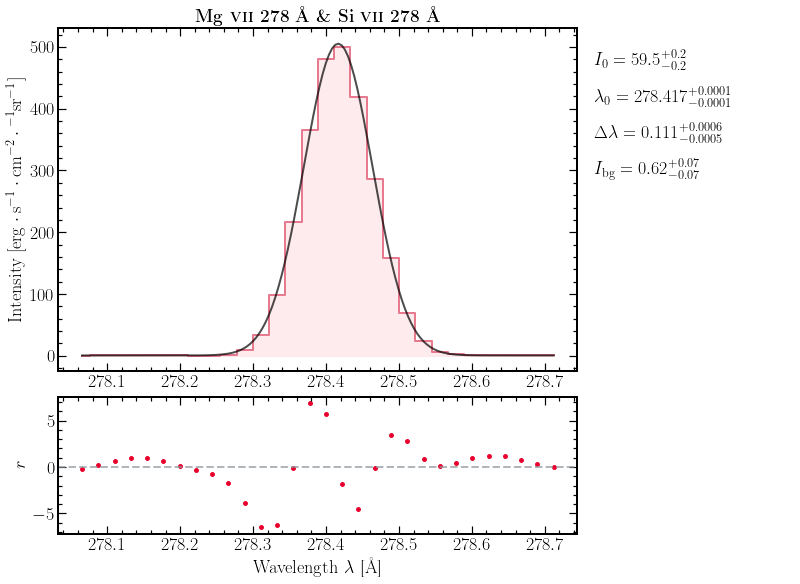

In [84]:
MgVII_SiVII_278_slice = (3500,3530)
wvl_MgVII_SiVII_278 = wvl[MgVII_SiVII_278_slice[0]:MgVII_SiVII_278_slice[1]]
int_MgVII_SiVII_278 = np.average(syn_spec[6:9,MgVII_SiVII_278_slice[0]:MgVII_SiVII_278_slice[1]],axis=0)

MgVII_SiVII_278_fit_model = SpectrumFitSingle(data=int_MgVII_SiVII_278,wvl=wvl_MgVII_SiVII_278,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[278.42],
                                      int_max_init=[700],fwhm_init=[0.08])
# MgVII_SiVII_278_fit_model.plot(plot_fit=False,plot_params=False)
MgVII_SiVII_278_fit_model.run_HahnMC(n_chain=10000)
# MgVII_SiVII_278_fit_model.run_lse()
MgVII_SiVII_278_fit_model.plot(plot_title=r"\textbf{Mg \textsc{vii} 278 \mbox{\AA} \& Si \textsc{vii} 278 \mbox{\AA} }",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(MgVII_SiVII_278_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.09383818 0.07407233]


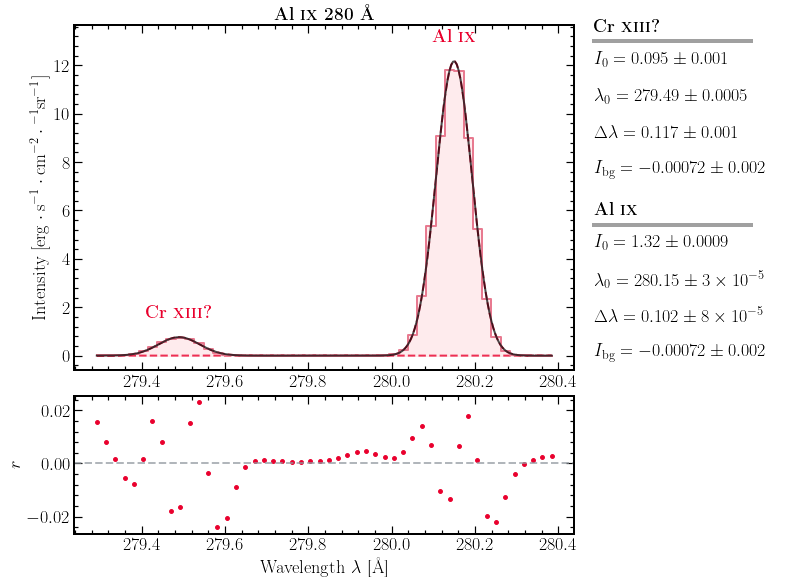

In [85]:
OIV_279_AlIX_280_slice = (3555,3605)
wvl_OIV_279_AlIX_280 = wvl[OIV_279_AlIX_280_slice[0]:OIV_279_AlIX_280_slice[1]]
int_OIV_279_AlIX_280 = np.average(syn_spec[6:9,OIV_279_AlIX_280_slice[0]:OIV_279_AlIX_280_slice[1]],axis=0)

OIV_279_AlIX_280_fit_model = SpectrumFitSingle(data=int_OIV_279_AlIX_280,wvl=wvl_OIV_279_AlIX_280,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[279.5,280.12],
                                      int_max_init=[1,12],fwhm_init=[0.08,0.08])
# OIV_279_AlIX_280_fit_model.plot(plot_fit=False,plot_params=False)
# OIV_279_AlIX_280_fit_model.run_HahnMC(n_chain=10000)
OIV_279_AlIX_280_fit_model.run_lse()
OIV_279_AlIX_280_fit_model.plot(plot_title=r"\textbf{Al \textsc{ix} 280 \mbox{\AA} }",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Cr \textsc{xiii}?}",r"\textbf{Al \textsc{ix}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(OIV_279_AlIX_280_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.06763625]


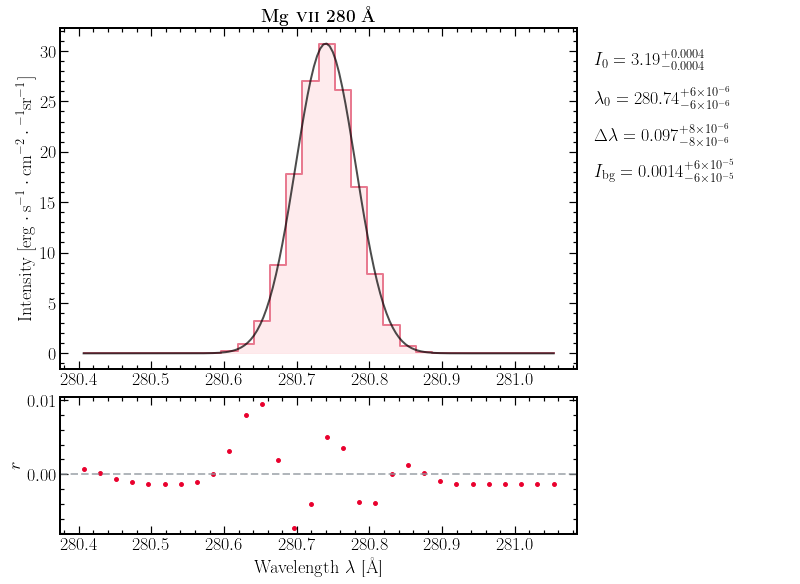

In [86]:
MgVII_280_slice = (3605,3635)
wvl_MgVII_280 = wvl[MgVII_280_slice[0]:MgVII_280_slice[1]]
int_MgVII_280 = np.average(syn_spec[6:9,MgVII_280_slice[0]:MgVII_280_slice[1]],axis=0)

MgVII_280_fit_model = SpectrumFitSingle(data=int_MgVII_280,wvl=wvl_MgVII_280,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[280.71],
                                      int_max_init=[50],fwhm_init=[0.08])
# MgVII_280_fit_model.plot(plot_fit=False,plot_params=False)
MgVII_280_fit_model.run_HahnMC(n_chain=10000)
# MgVII_280_fit_model.run_lse()
MgVII_280_fit_model.plot(plot_title=r"\textbf{Mg \textsc{vii} 280 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(MgVII_280_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.07548735]


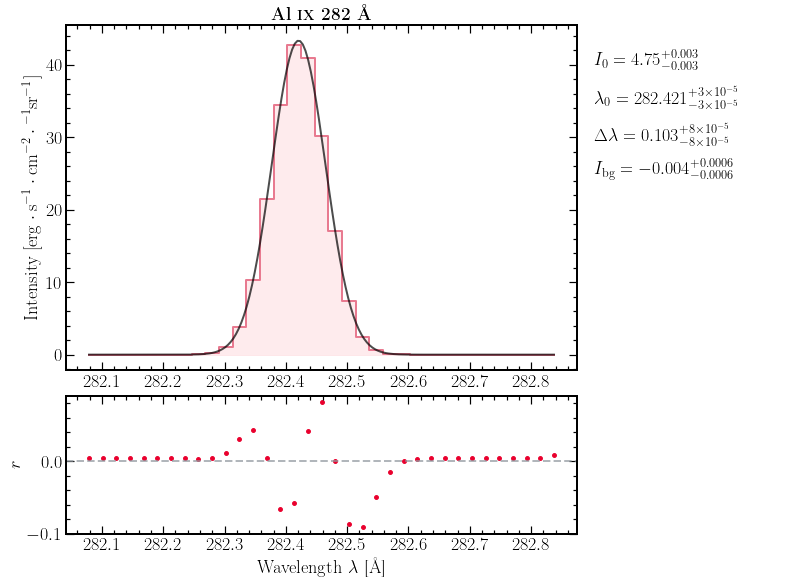

In [87]:
AlIX_282_slice = (3680,3715)
wvl_AlIX_282 = wvl[AlIX_282_slice[0]:AlIX_282_slice[1]]
int_AlIX_282 = np.average(syn_spec[6:9,AlIX_282_slice[0]:AlIX_282_slice[1]],axis=0)

AlIX_282_fit_model = SpectrumFitSingle(data=int_AlIX_282,wvl=wvl_AlIX_282,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[282.4],
                                      int_max_init=[40],fwhm_init=[0.08])
# AlIX_282_fit_model.plot(plot_fit=False,plot_params=False)
AlIX_282_fit_model.run_HahnMC(n_chain=10000)
# AlIX_282_fit_model.run_lse()
AlIX_282_fit_model.plot(plot_title=r"\textbf{Al \textsc{ix} 282 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(AlIX_282_fit_model.fwhm_fit_hmc**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.08818863 0.06232094]


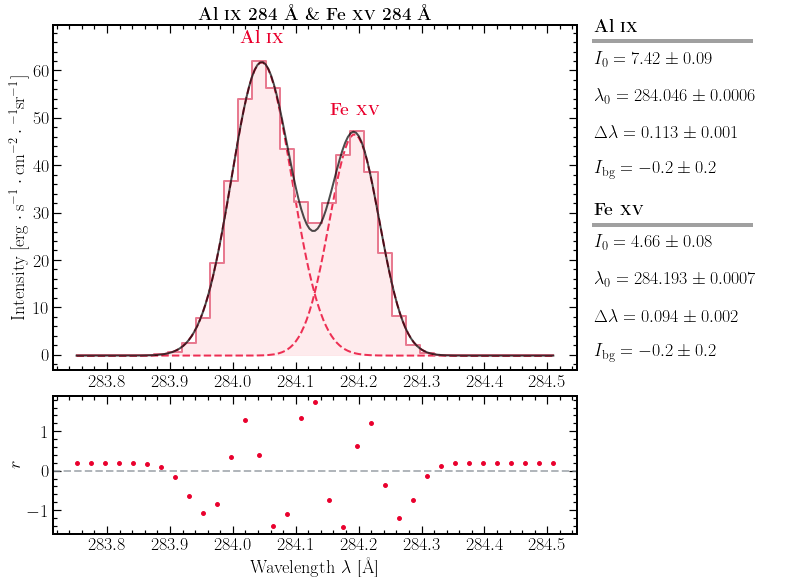

In [88]:
AlIX_FeXV_284_slice = (3755,3790)
wvl_AlIX_FeXV_284 = wvl[AlIX_FeXV_284_slice[0]:AlIX_FeXV_284_slice[1]]
int_AlIX_FeXV_284 = np.average(syn_spec[6:9,AlIX_FeXV_284_slice[0]:AlIX_FeXV_284_slice[1]],axis=0)

AlIX_FeXV_284_fit_model = SpectrumFitSingle(data=int_AlIX_FeXV_284,wvl=wvl_AlIX_FeXV_284,err=None,
                                      same_width=False,line_number=2,line_wvl_init=[284.02,284.15],
                                      int_max_init=[60,50],fwhm_init=[0.08,0.08])
# AlIX_FeXV_284_fit_model.plot(plot_fit=False,plot_params=False)
# AlIX_FeXV_284_fit_model.run_HahnMC(n_chain=10000)
AlIX_FeXV_284_fit_model.run_lse()
AlIX_FeXV_284_fit_model.plot(plot_title=r"\textbf{Al \textsc{ix} 284 \mbox{\AA} \& Fe \textsc{xv} 284 \mbox{\AA} }",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Al \textsc{ix}}",r"\textbf{Fe \textsc{xv}}"],
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(AlIX_FeXV_284_fit_model.fwhm_fit**2 - \
                                                   0.07**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.08230267]


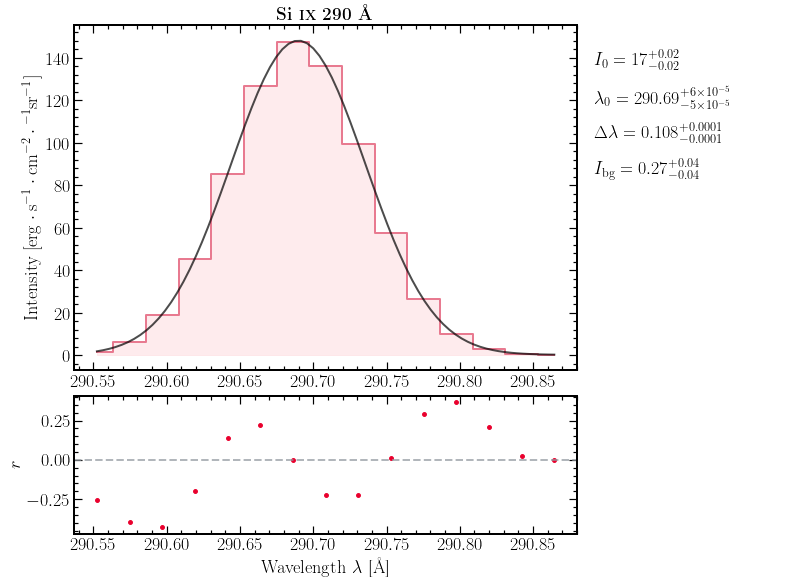

In [89]:
SiIX_290_slice = (4060,4075)
wvl_SiIX_290 = wvl[SiIX_290_slice[0]:SiIX_290_slice[1]]
int_SiIX_290 = np.average(syn_spec[6:9,SiIX_290_slice[0]:SiIX_290_slice[1]],axis=0)

SiIX_290_fit_model = SpectrumFitSingle(data=int_SiIX_290,wvl=wvl_SiIX_290,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[290.7],
                                      int_max_init=[140],fwhm_init=[0.08])
# SiIX_290_fit_model.plot(plot_fit=False,plot_params=False)
SiIX_290_fit_model.run_HahnMC(n_chain=10000)
# SiIX_290_fit_model.run_lse()
SiIX_290_fit_model.plot(plot_title=r"\textbf{Si \textsc{ix} 290 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

print("FWHM after removing instrumental broadening: ",np.sqrt(SiIX_290_fit_model.fwhm_fit**2 - \
                                                   0.07**2))